# Google Stock Price Prediction :-

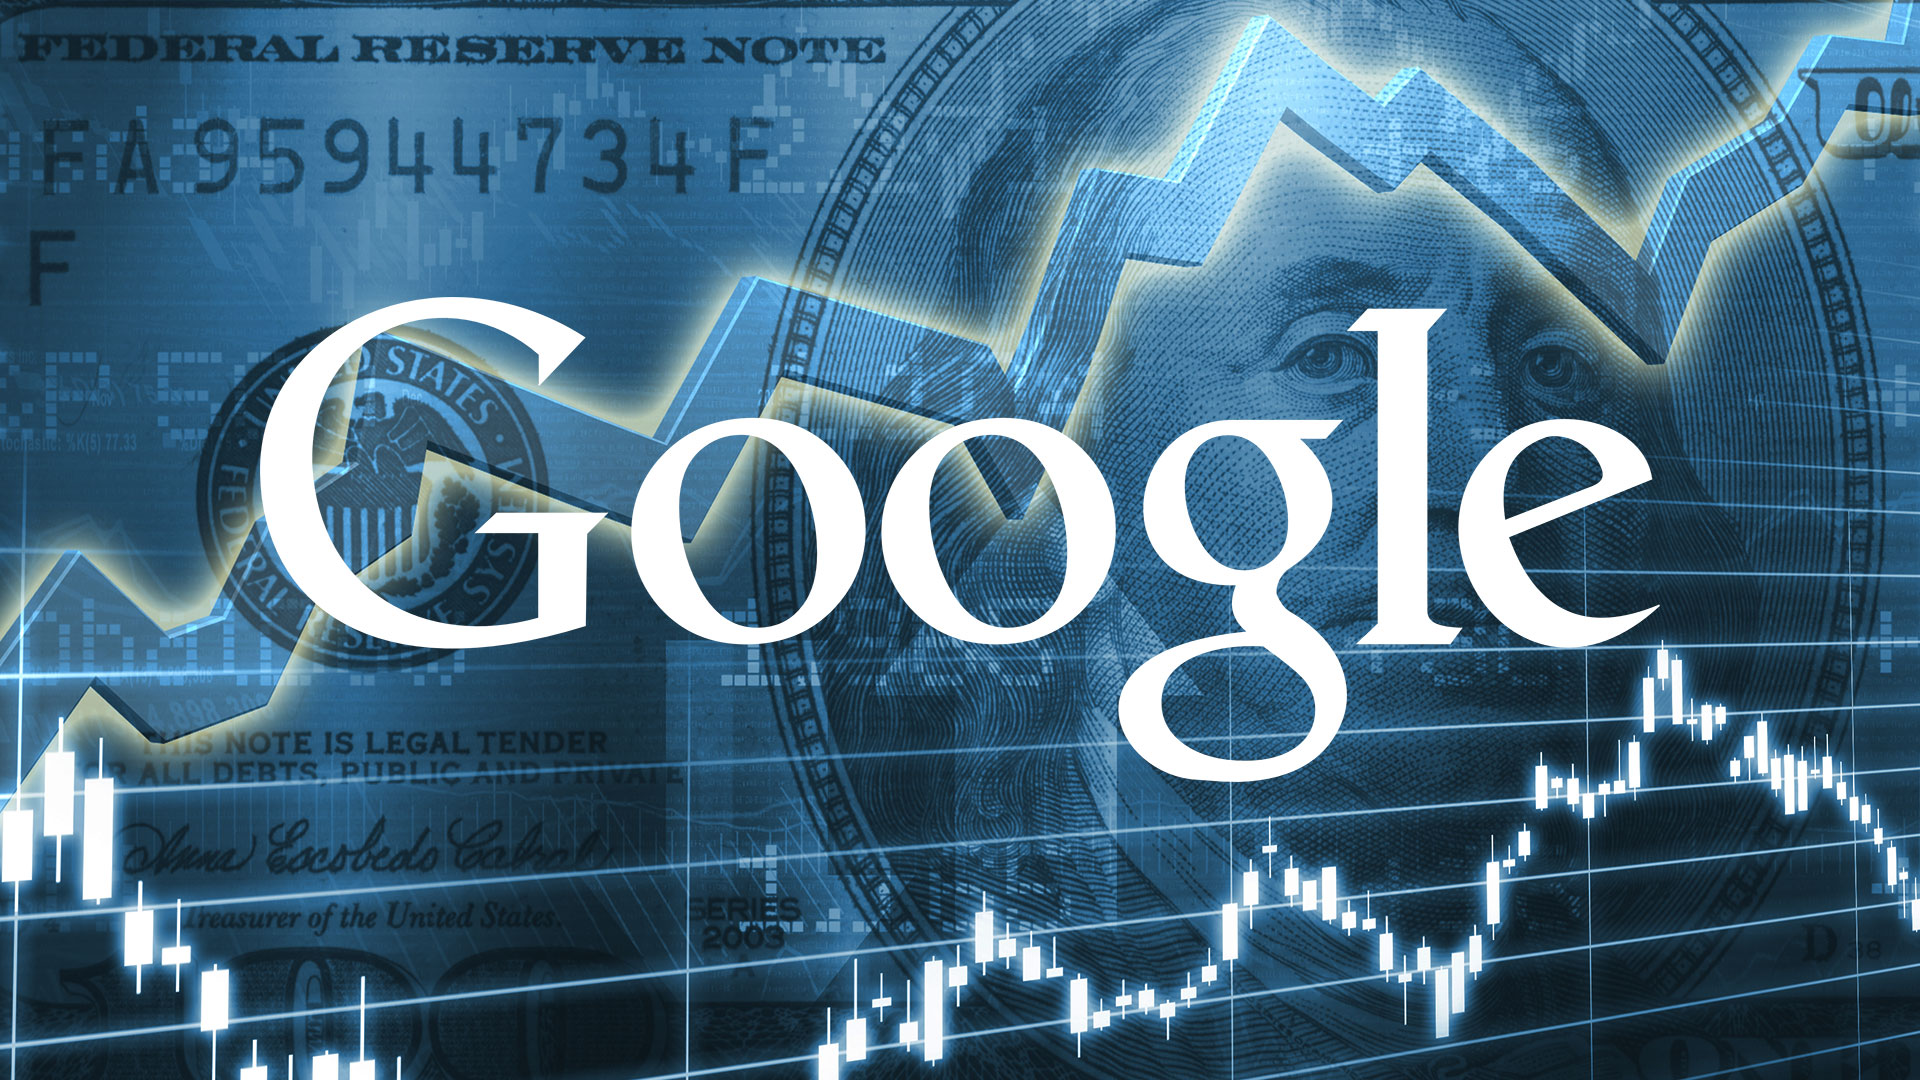

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\goog3.jpg")

In [2]:
!pip install pandas-datareader --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install alpha_vantage


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statistics
import math
import warnings
warnings.filterwarnings('ignore')
import scipy
import tensorflow
from tensorflow import keras
from keras.layers import SimpleRNN,LSTM,GRU,Dense,Dropout
from keras.models import Sequential
from datetime import datetime

In [5]:
from alpha_vantage.timeseries import TimeSeries
api_key = '59c37308a2009443660afe6970756ee6007d9710'
ts = TimeSeries(key=api_key, output_format='pandas')
symbol = 'GOOG'
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

print(data.head())

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2023-09-22   131.68  133.010  130.51    131.25  17355284.0
2023-09-21   132.39  133.190  131.09    131.36  22058375.0
2023-09-20   138.83  138.840  134.52    134.59  21473533.0
2023-09-19   138.25  139.175  137.50    138.83  15484644.0
2023-09-18   137.63  139.930  137.63    138.96  16233590.0


In [6]:
data.to_csv('google_stocks.csv')

In [7]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOG',
 '3. Last Refreshed': '2023-09-22',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [8]:
df=pd.read_csv('google_stocks.csv')
df

,date,1. open,2. high,3. low,4. close,5. volume
0,2023-09-22,131.680,133.010,130.51,131.25,17355284.0
1,2023-09-21,132.390,133.190,131.09,131.36,22058375.0
2,2023-09-20,138.830,138.840,134.52,134.59,21473533.0
3,2023-09-19,138.250,139.175,137.50,138.83,15484644.0
4,2023-09-18,137.630,139.930,137.63,138.96,16233590.0
...,...,...,...,...,...,...
2385,2014-04-02,565.106,604.830,562.19,567.00,146700.0
2386,2014-04-01,558.710,568.450,558.71,567.16,7900.0
2387,2014-03-31,566.890,567.000,556.93,556.97,10800.0
2388,2014-03-28,561.200,566.430,558.67,559.99,41100.0


In [9]:
df.isnull().sum()

date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [10]:
df['date'].nunique()

2390

In [11]:
df.set_index('date',inplace=True)
#df.drop(columns=['date'],axis=1,inplace=True)
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-09-22,131.680,133.010,130.51,131.25,17355284.0
2023-09-21,132.390,133.190,131.09,131.36,22058375.0
2023-09-20,138.830,138.840,134.52,134.59,21473533.0
2023-09-19,138.250,139.175,137.50,138.83,15484644.0
2023-09-18,137.630,139.930,137.63,138.96,16233590.0
...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,146700.0
2014-04-01,558.710,568.450,558.71,567.16,7900.0
2014-03-31,566.890,567.000,556.93,556.97,10800.0


In [12]:
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-09-22,131.680,133.010,130.51,131.25,17355284.0
2023-09-21,132.390,133.190,131.09,131.36,22058375.0
2023-09-20,138.830,138.840,134.52,134.59,21473533.0
2023-09-19,138.250,139.175,137.50,138.83,15484644.0
2023-09-18,137.630,139.930,137.63,138.96,16233590.0
...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,146700.0
2014-04-01,558.710,568.450,558.71,567.16,7900.0
2014-03-31,566.890,567.000,556.93,556.97,10800.0


In [13]:
df.index=pd.to_datetime(df.index)

In [14]:
df.index.dtype

dtype('<M8[ns]')

In [15]:
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-09-22,131.680,133.010,130.51,131.25,17355284.0
2023-09-21,132.390,133.190,131.09,131.36,22058375.0
2023-09-20,138.830,138.840,134.52,134.59,21473533.0
2023-09-19,138.250,139.175,137.50,138.83,15484644.0
2023-09-18,137.630,139.930,137.63,138.96,16233590.0
...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,146700.0
2014-04-01,558.710,568.450,558.71,567.16,7900.0
2014-03-31,566.890,567.000,556.93,556.97,10800.0


In [16]:
df.sort_index(inplace=True)
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2014-03-27,568.000,568.000,552.92,558.46,13100.0
2014-03-28,561.200,566.430,558.67,559.99,41100.0
2014-03-31,566.890,567.000,556.93,556.97,10800.0
2014-04-01,558.710,568.450,558.71,567.16,7900.0
2014-04-02,565.106,604.830,562.19,567.00,146700.0
...,...,...,...,...,...
2023-09-18,137.630,139.930,137.63,138.96,16233590.0
2023-09-19,138.250,139.175,137.50,138.83,15484644.0
2023-09-20,138.830,138.840,134.52,134.59,21473533.0


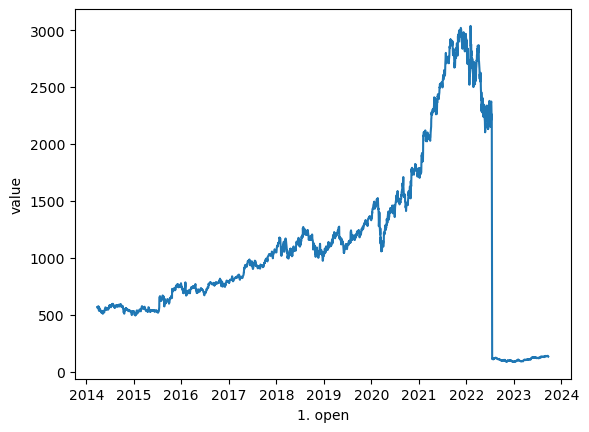

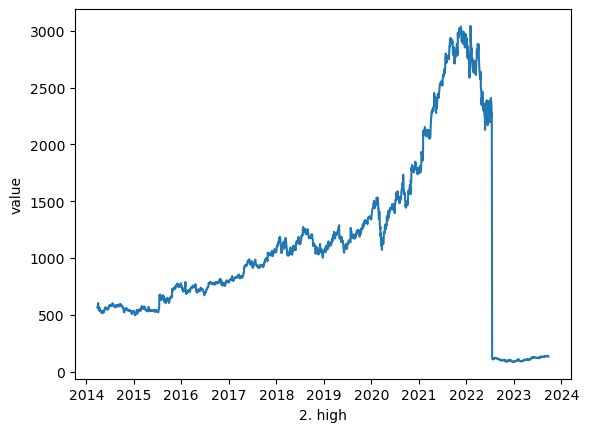

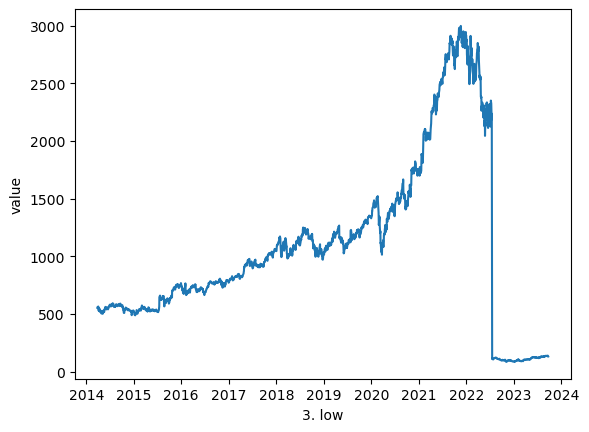

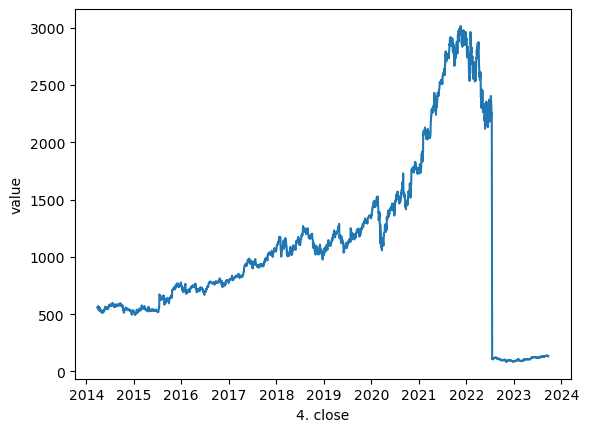

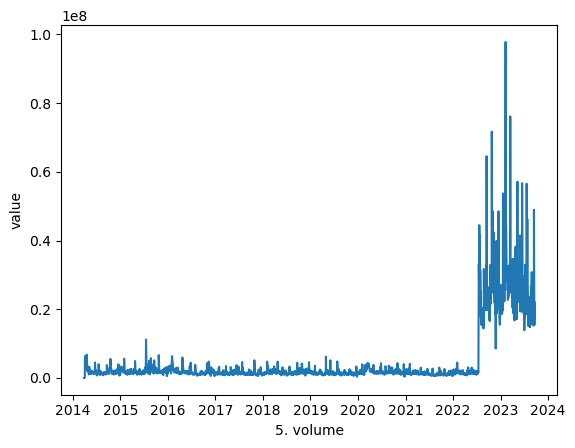

In [17]:
for i in df.columns:
    plt.plot(df[i])
    plt.xlabel(i)
    plt.ylabel('value')
    plt.show()

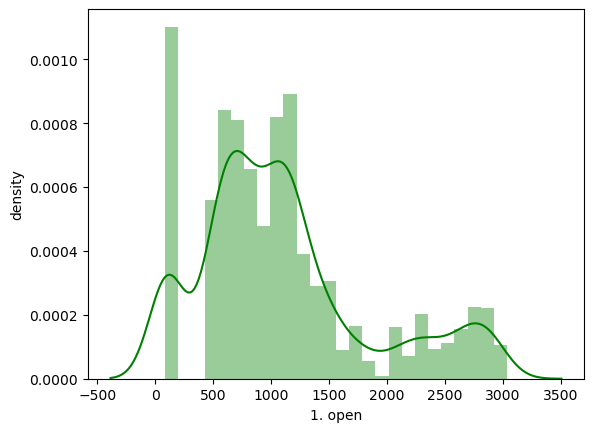

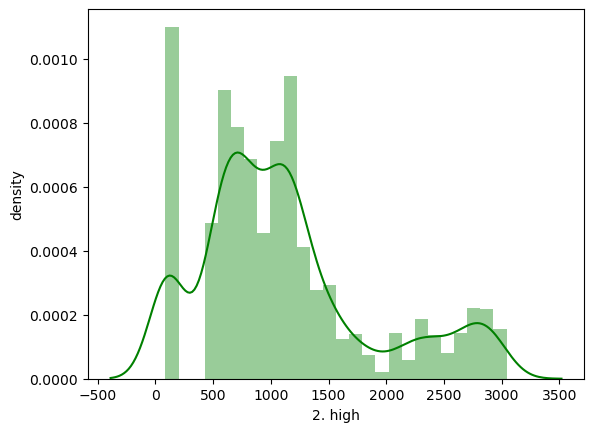

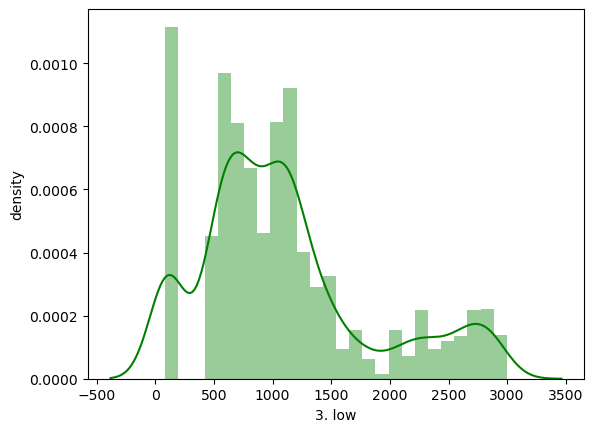

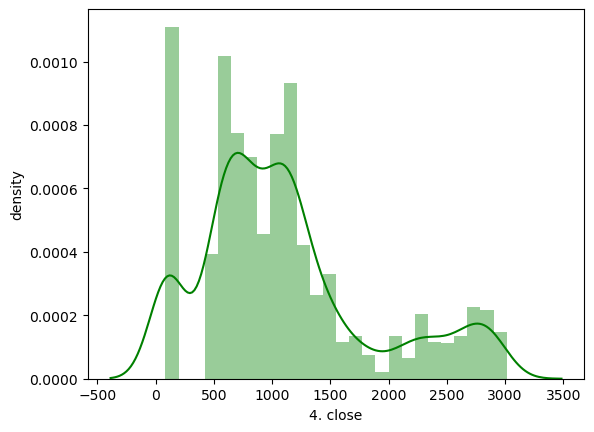

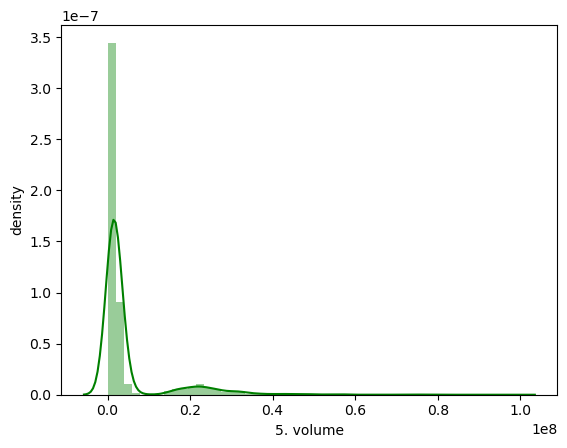

In [18]:
for d in df.columns:
    sns.distplot(df[d],color='green')
    plt.xlabel(d)
    plt.ylabel('density')
    plt.show()

In [19]:
df1=pd.DataFrame(df['2. high'])
df1.rename(columns={'2. high' : 'high'},inplace=True)
df1

,high
date,
2014-03-27,568.000
2014-03-28,566.430
2014-03-31,567.000
2014-04-01,568.450
2014-04-02,604.830
...,...
2023-09-18,139.930
2023-09-19,139.175
2023-09-20,138.840


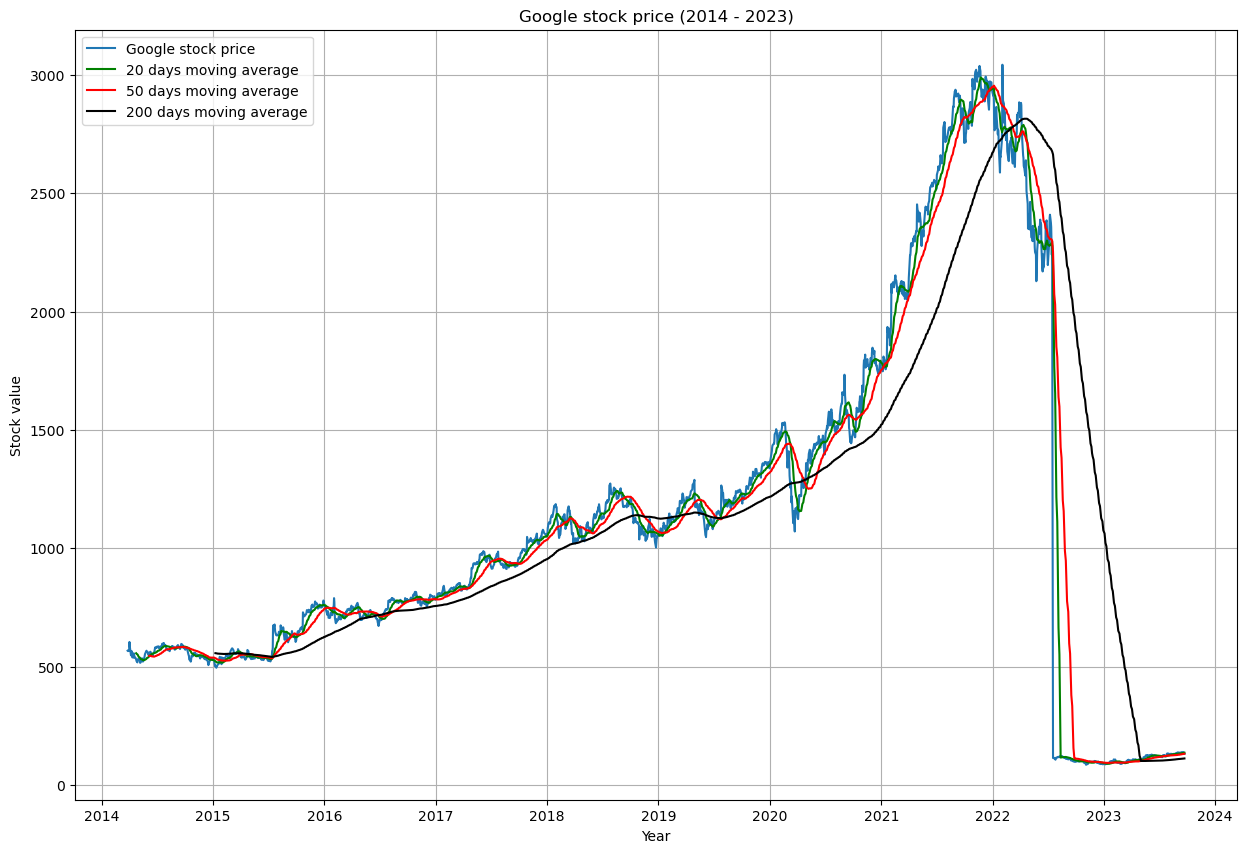

In [20]:
plt.figure(figsize=(15,10))
plt.plot(df1.index,df1['high'],label='Google stock price')
plt.plot(df1.index,df1['high'].rolling(20).mean(),color='green',label='20 days moving average')
plt.plot(df1.index,df1['high'].rolling(50).mean(),color='red',label='50 days moving average')
plt.plot(df1.index,df1['high'].rolling(200).mean(),color='black',label='200 days moving average')
plt.xlabel('Year')
plt.ylabel('Stock value')
plt.title('Google stock price (2014 - 2023)')
plt.grid()
plt.legend()
plt.show()

## Volume 

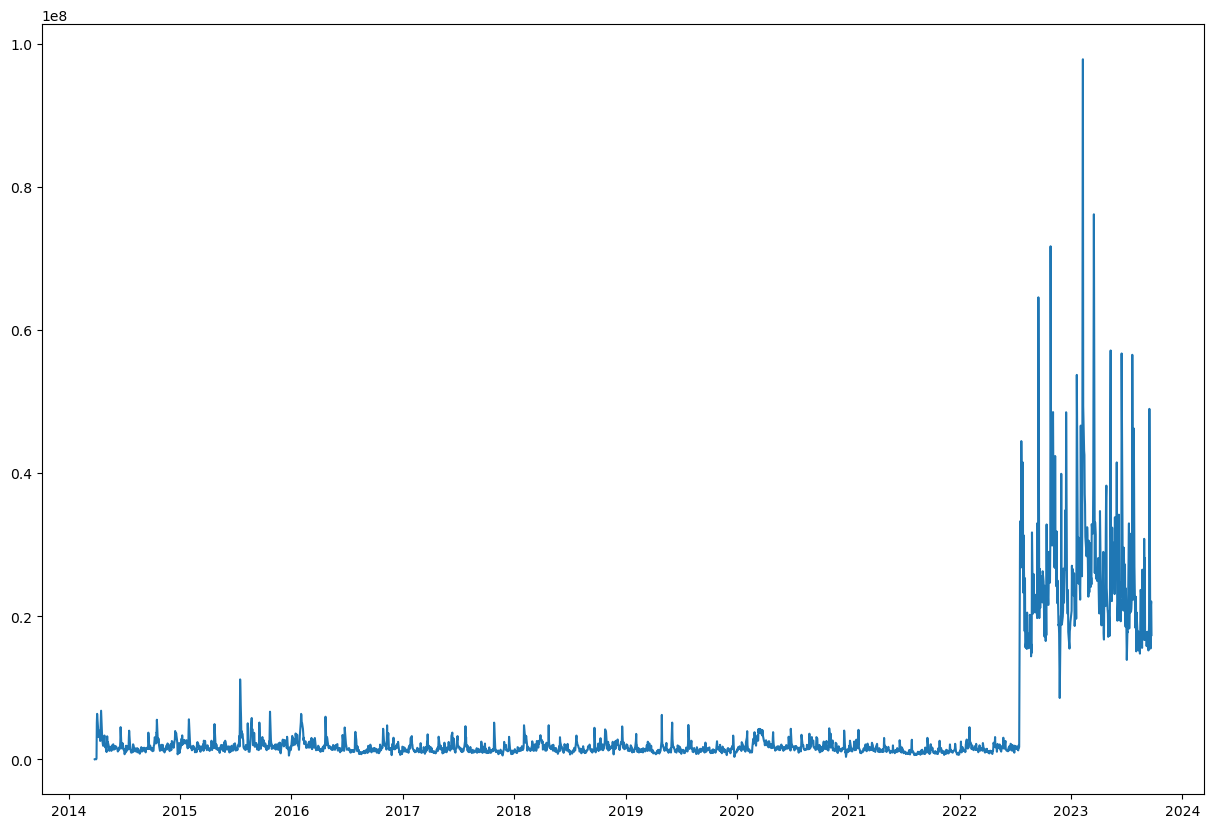

In [21]:
plt.figure(figsize=(15,10))
plt.plot(df.index,df['5. volume'])
plt.show()

## Daily return

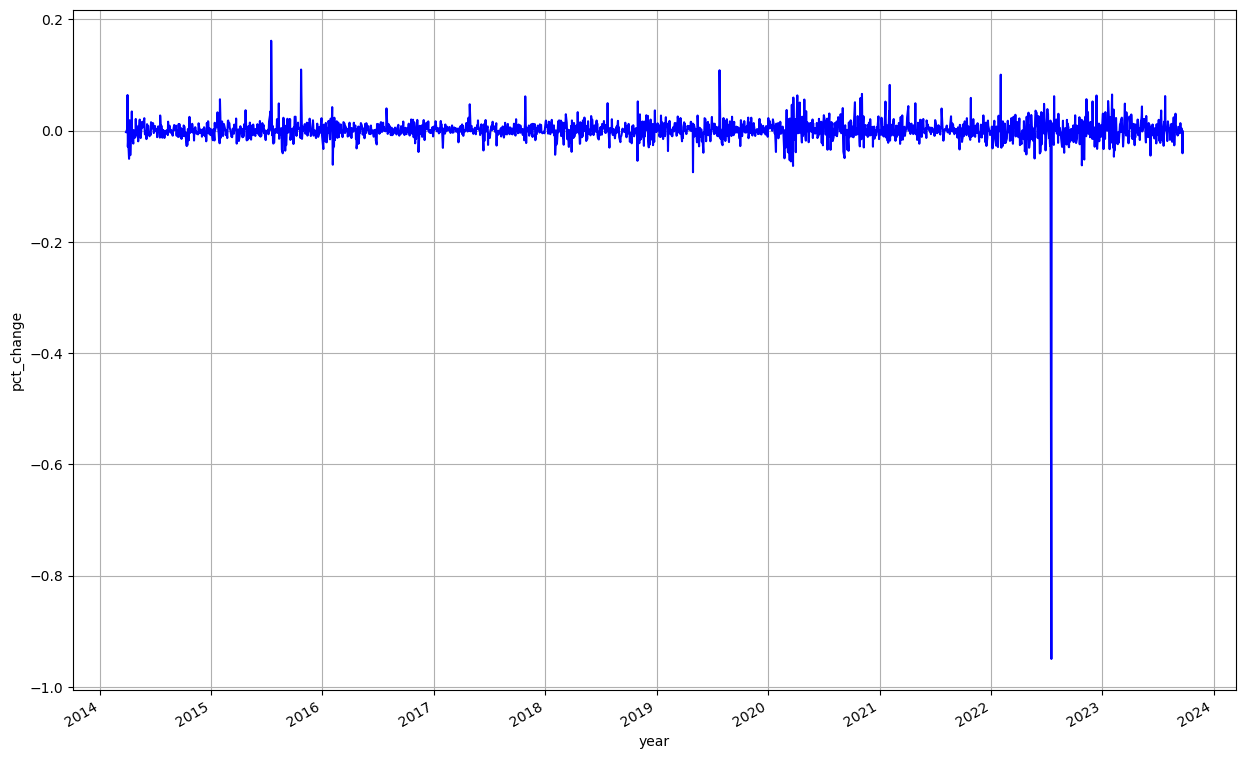

In [22]:
df1['daily return']=df1['high'].pct_change()
plt.figure(figsize=(15,10))
df1['daily return'].plot(color='blue')
plt.ylabel('pct_change')
plt.xlabel('year')
plt.grid()
plt.show()

In [23]:
print("        # Day of downfall #")
print()
print(df1.loc[df1['daily return']< -0.8])
print()
print("       # Day Before downfall #")
print()
print(df1.loc[df1.index == '2022-07-15'])

        # Day of downfall #

             high  daily return
date                           
2022-07-18  114.8     -0.949649

       # Day Before downfall #

               high  daily return
date                             
2022-07-15  2280.01      0.017975


In [24]:
df3=pd.DataFrame(df1['high'].resample('M').mean())
df4=df.resample('M').mean()

In [25]:
df3

,high
date,
2014-03-31,567.143333
2014-04-30,549.592381
2014-05-31,537.571552
2014-06-30,561.528857
2014-07-31,587.762845
...,...
2023-05-31,118.074495
2023-06-30,124.631667
2023-07-31,125.080995


In [26]:
mon_in=[]
for i in range(0,len(df4)):
     mon_in.append(df4.index[i].month)
df4['month'] = mon_in
df4['month']=df4['month'].replace({1:'jan',2:'feb',3:'mar',4:'apr',
                                   5:'may',6:'jun',7:'jul',
                                   8:'aug',9:'sep',10:'oct',
                                   11:'nov',12:'dec'})    
df4

,1. open,2. high,3. low,4. close,5. volume,month
date,,,,,,
2014-03-31,565.363333,567.143333,556.173333,558.473333,2.166667e+04,mar
2014-04-30,542.309333,549.592381,533.041957,540.028571,3.198629e+06,apr
2014-05-31,533.136190,537.571552,528.415857,534.053333,1.739414e+06,may
2014-06-30,557.843810,561.528857,552.762933,558.430476,1.804686e+06,jun
2014-07-31,584.146818,587.762845,579.376905,584.015677,1.568914e+06,jul
...,...,...,...,...,...,...
2023-05-31,116.268636,118.074495,115.315623,116.745682,2.819573e+07,may
2023-06-30,123.012886,124.631667,121.861190,123.228095,2.483253e+07,jun
2023-07-31,123.620050,125.080995,122.420495,123.553500,2.627798e+07,jul


# Year wise data analysis

In [27]:
y_14=df4.iloc[0:10,:]
dff4=df4.iloc[10:,:]
start=0
end=12
ch=[]
for c in range(start,end):
    ch.append([dff4.iloc[start:end,:]])
    start+=12
    end+=12
y15=ch[0][0]  
y16=ch[1][0]
y17=ch[2][0]
y18=ch[3][0]
y19=ch[4][0]
y20=ch[5][0]
y21=ch[6][0]
y22=ch[7][0]
y23=ch[8][0]

## Year 2014 

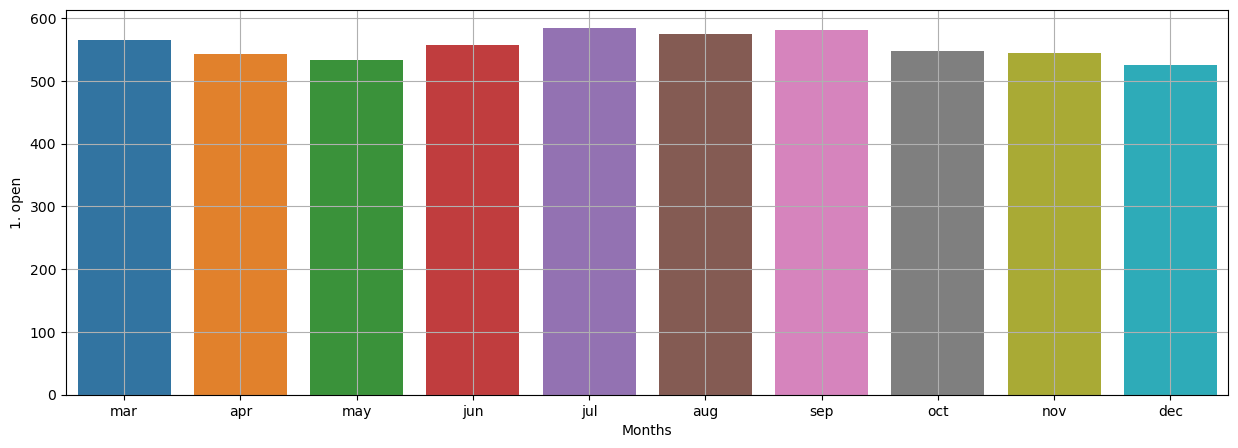

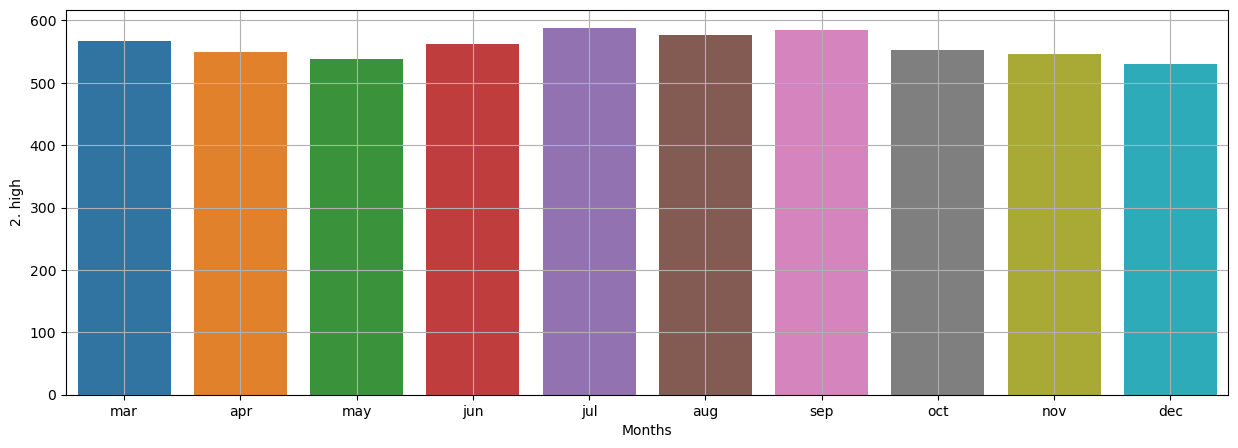

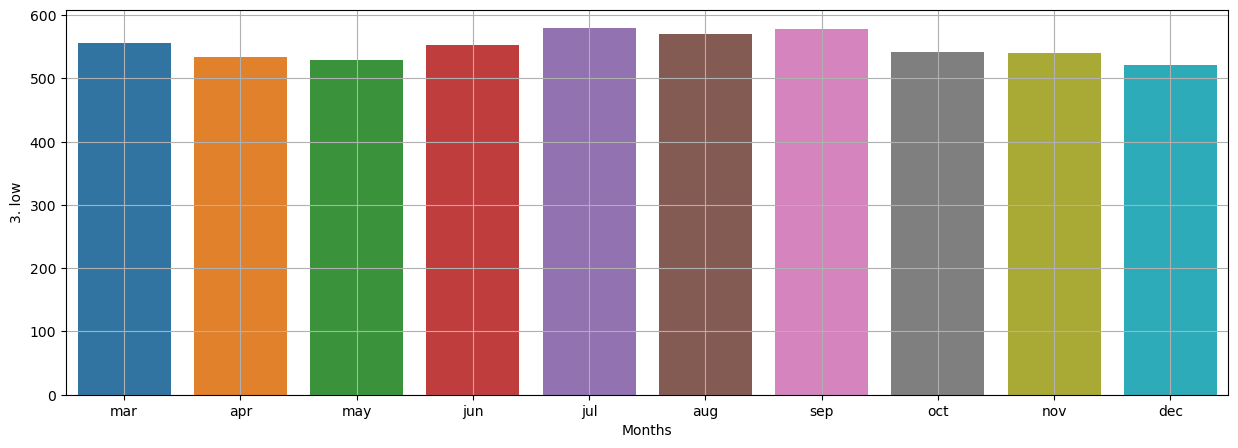

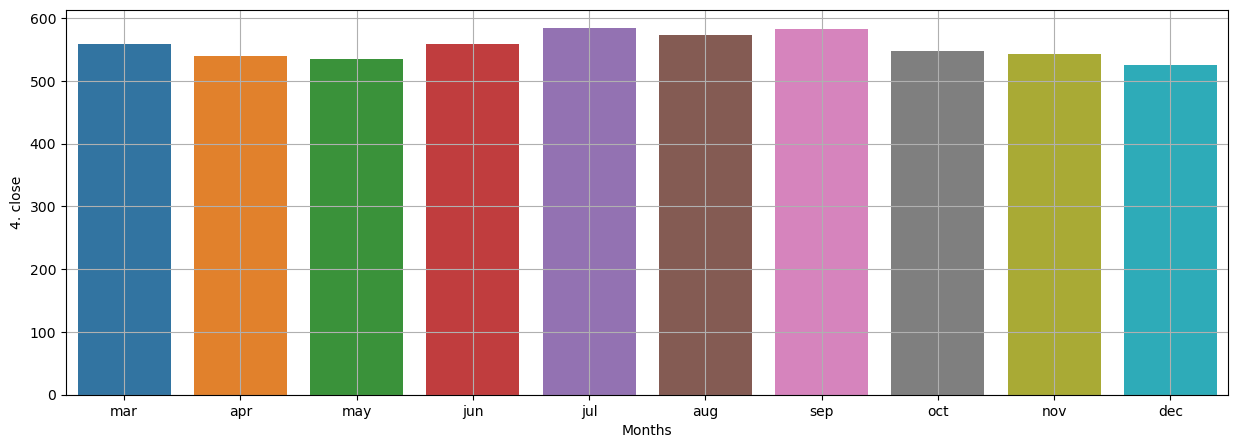

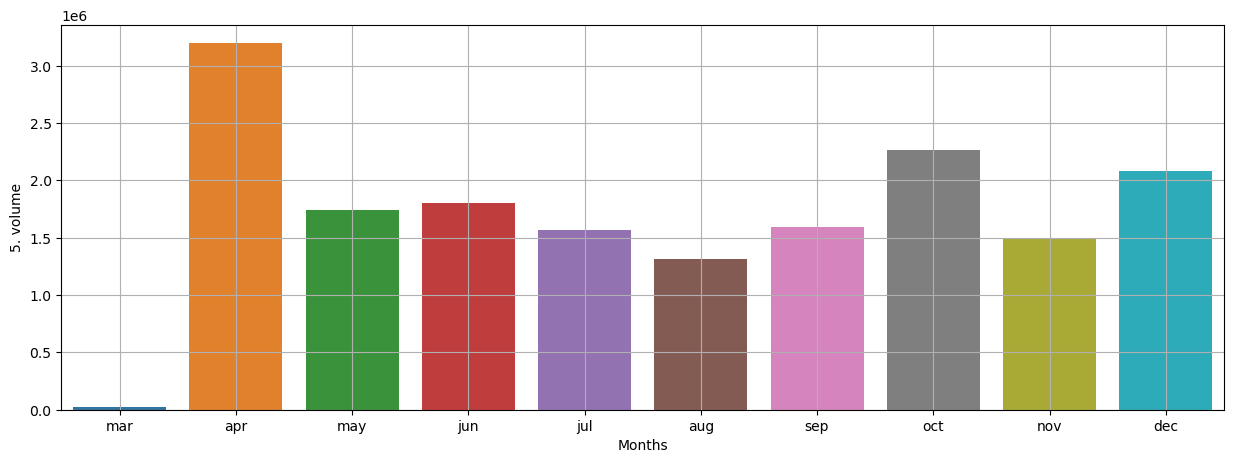

In [28]:
for y1 in y_14.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y_14['month'],y=y_14[y1])
    plt.xlabel('Months')
    plt.ylabel(y1)
    plt.grid()
    plt.show()

## Year 2015 

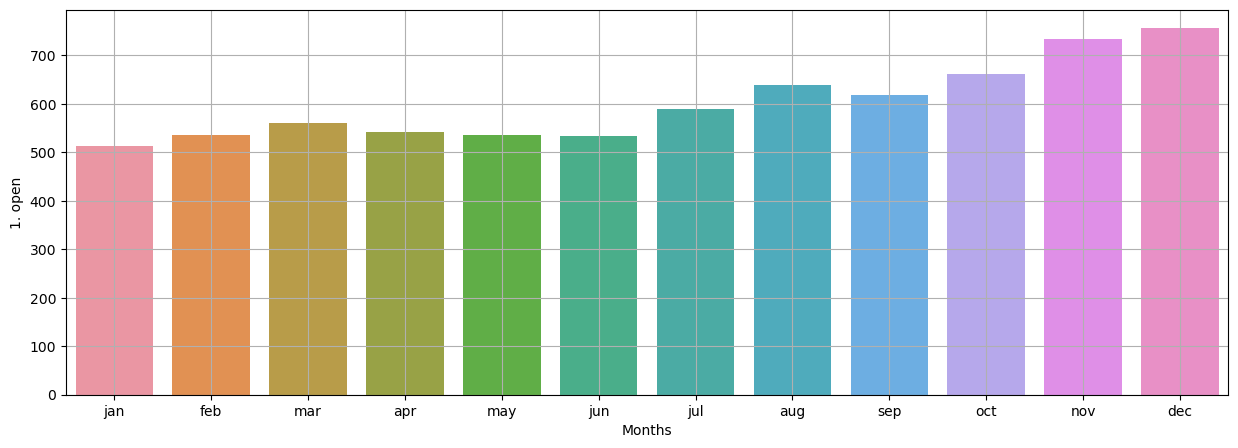

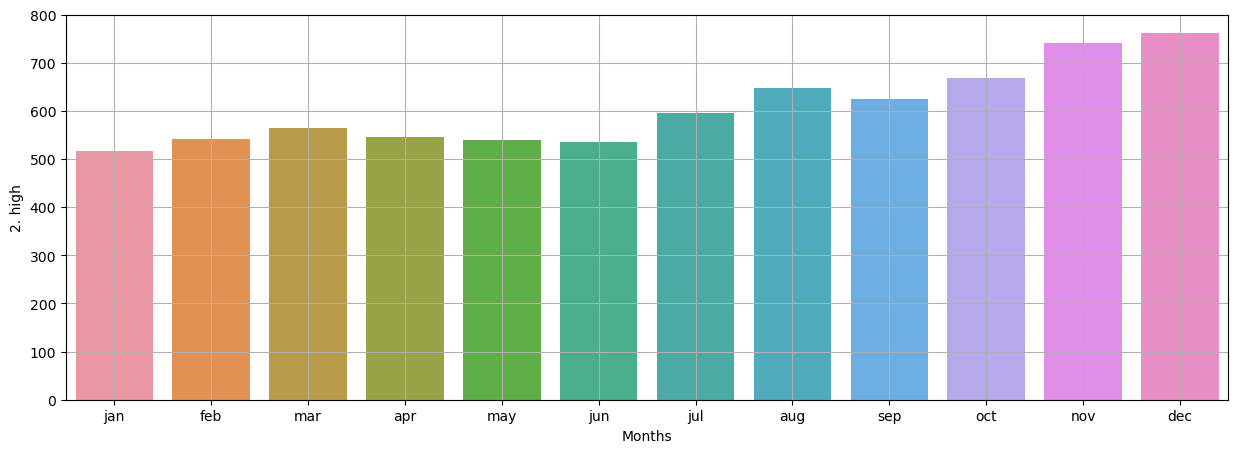

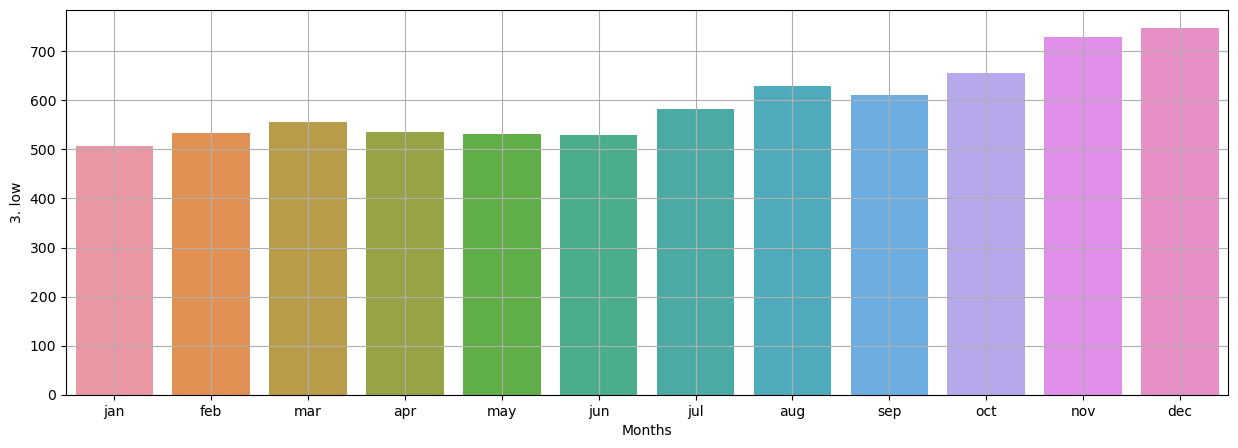

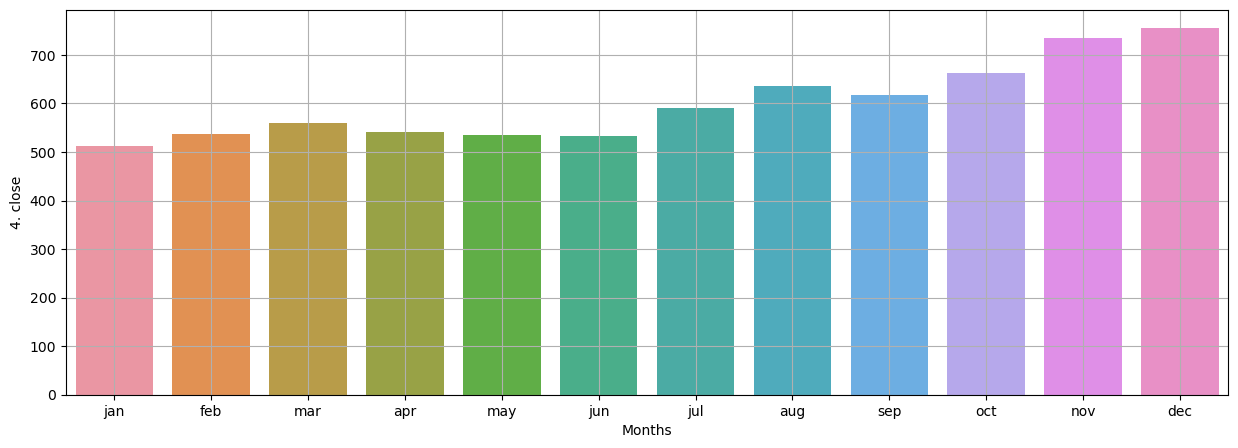

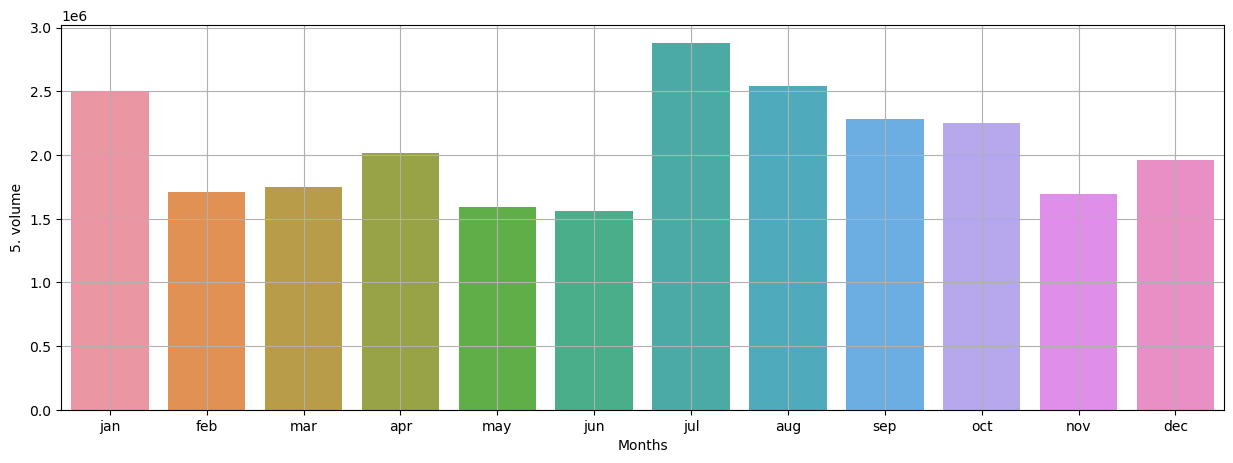

In [29]:
for y2 in y15.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y15['month'],y=y15[y2])
    plt.xlabel('Months')
    plt.ylabel(y2)
    plt.grid()
    plt.show()

## Year 2016

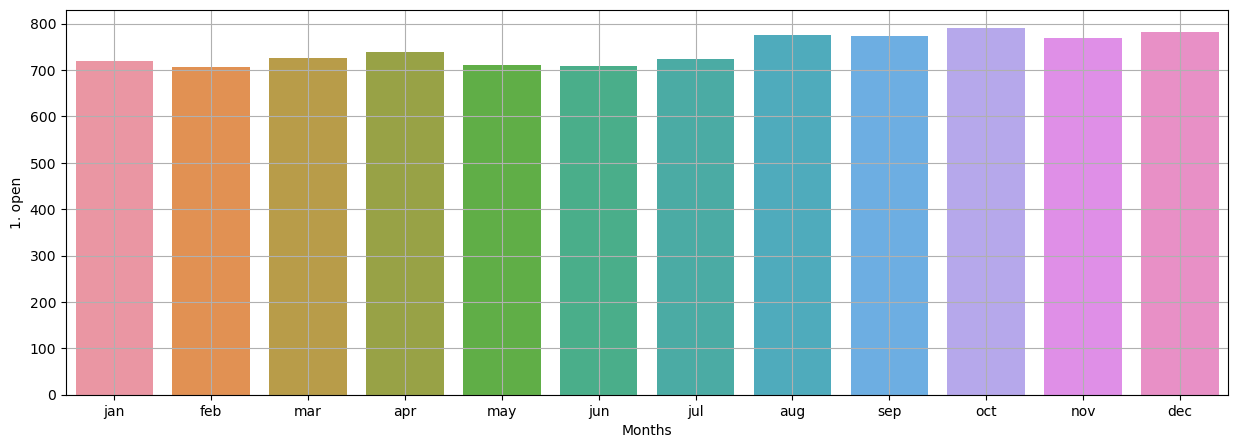

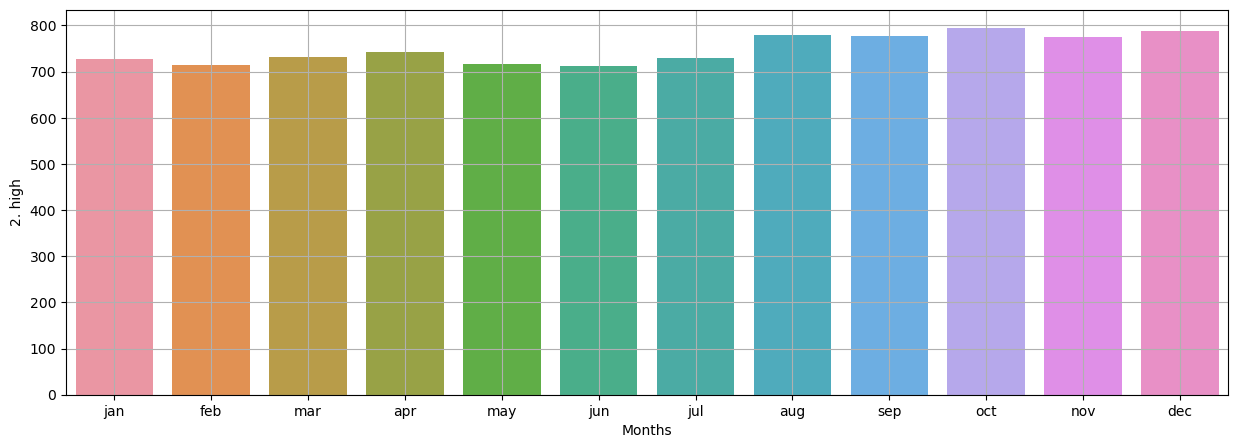

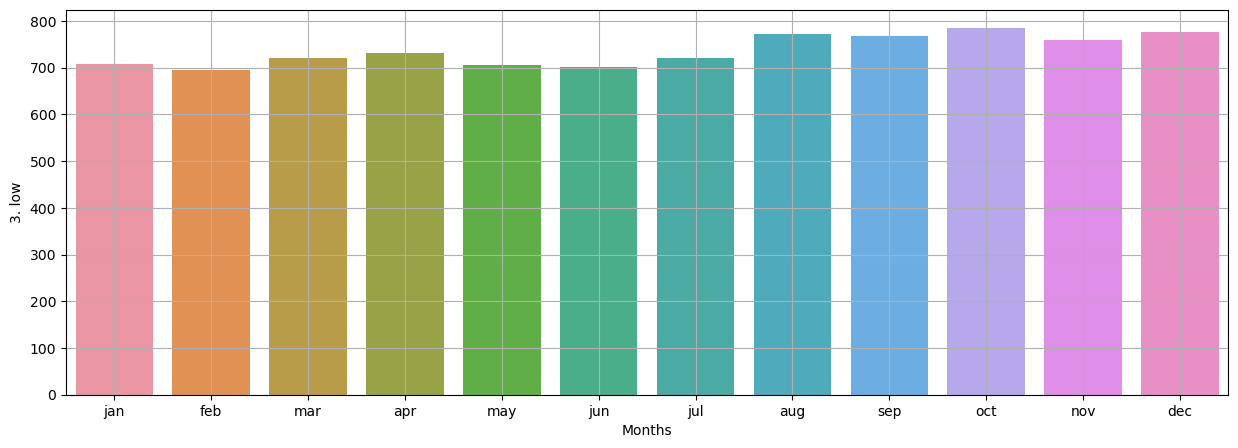

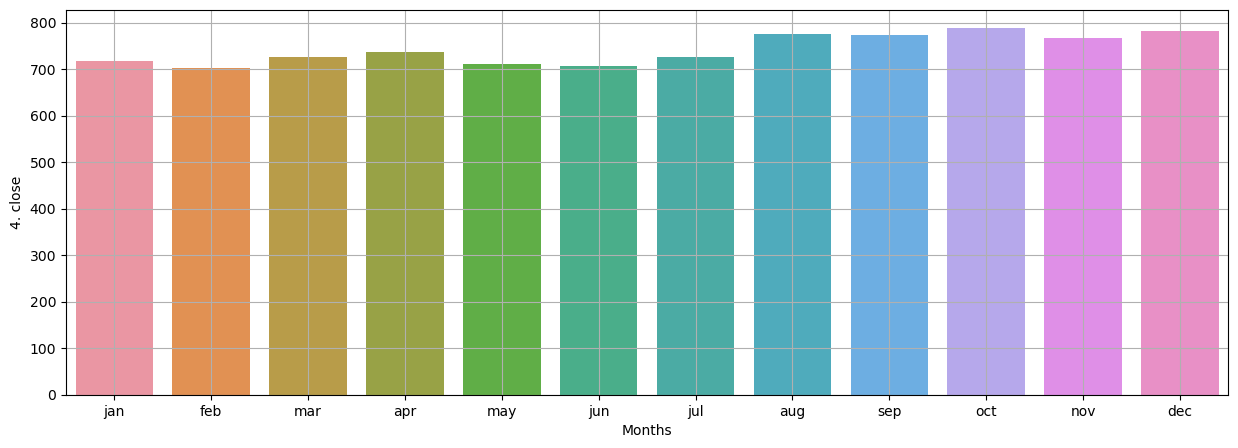

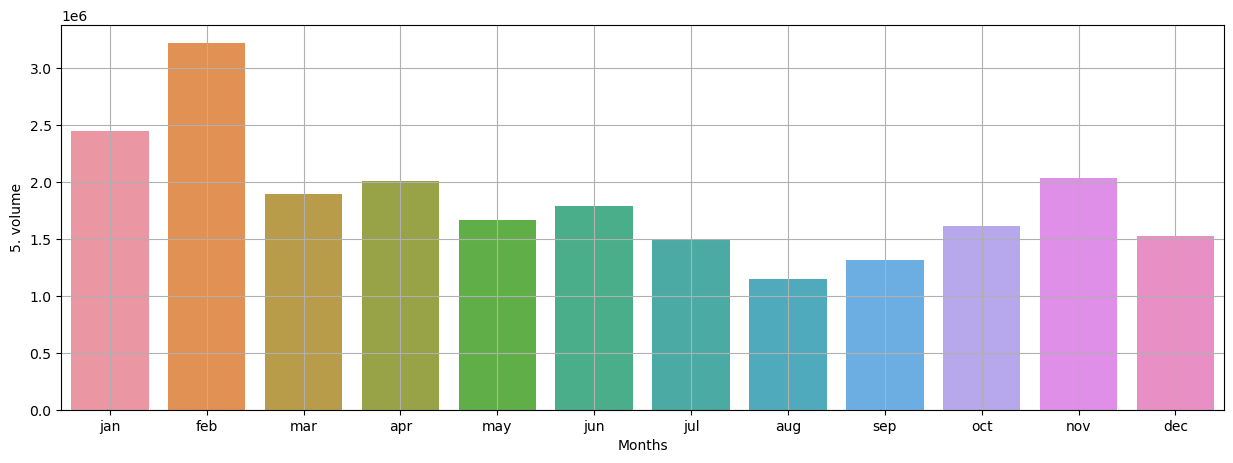

In [30]:
for y3 in y16.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y16['month'],y=y16[y3])
    plt.xlabel('Months')
    plt.ylabel(y3)
    plt.grid()
    plt.show()

## Year 2017 

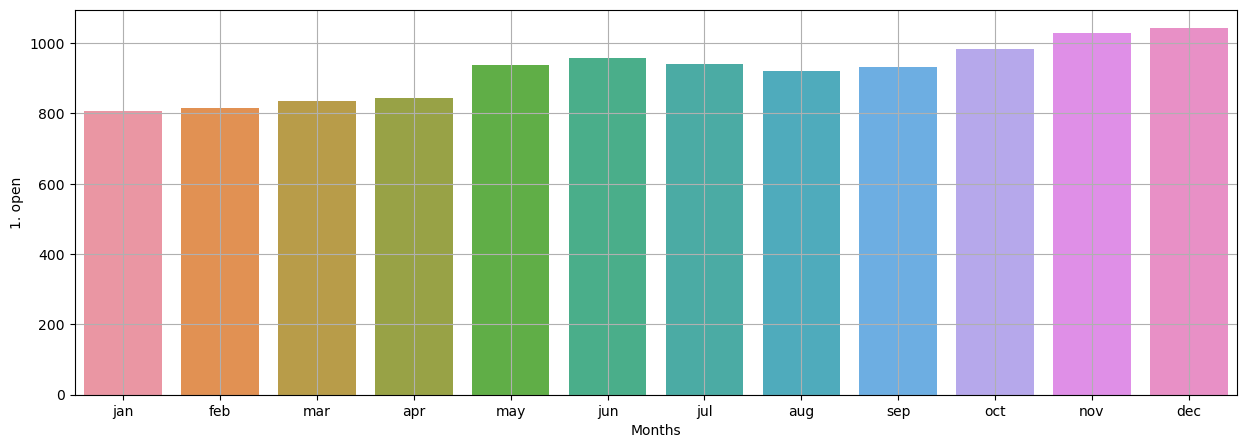

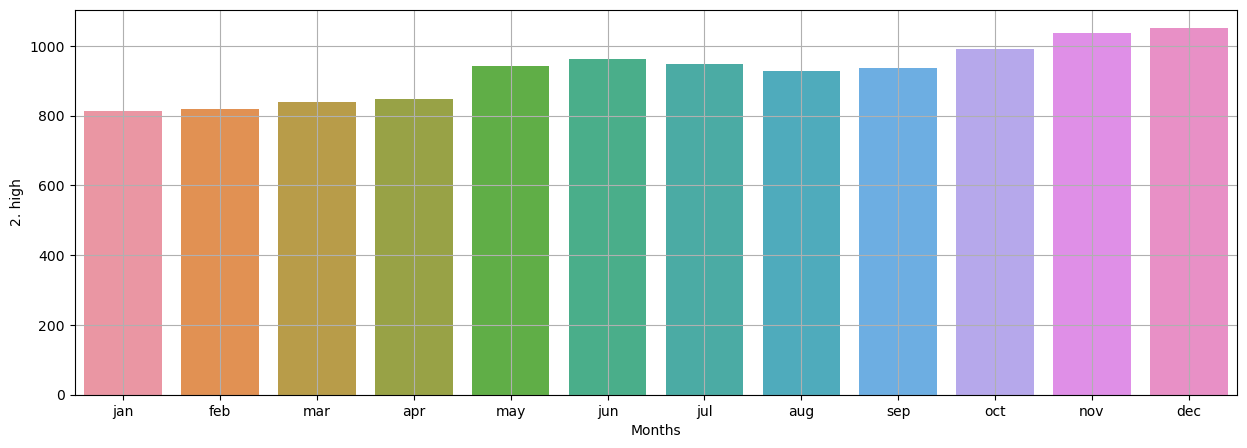

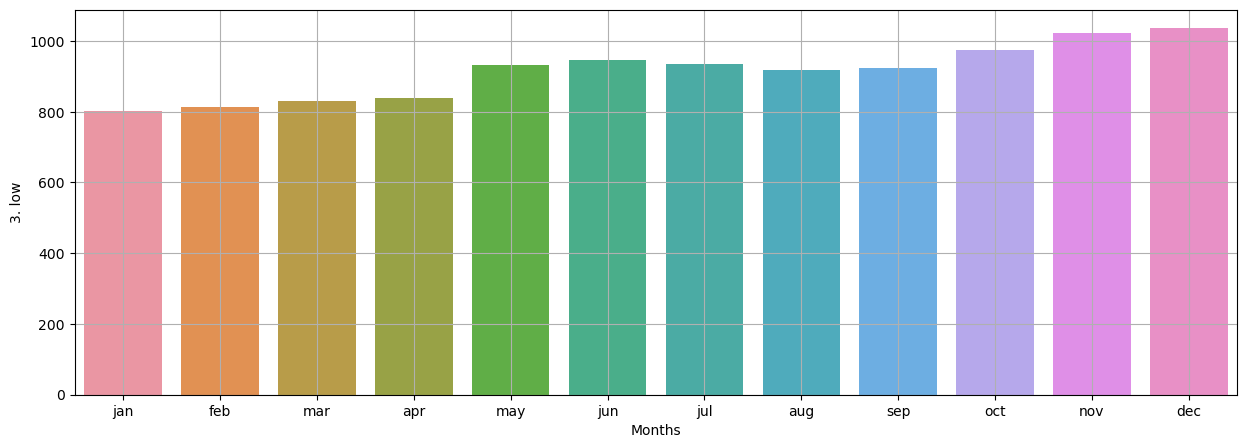

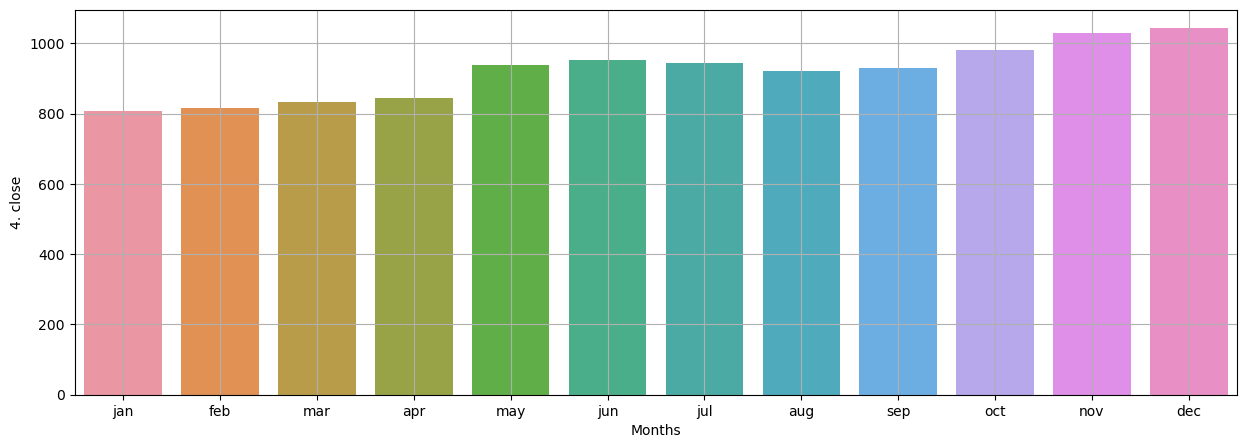

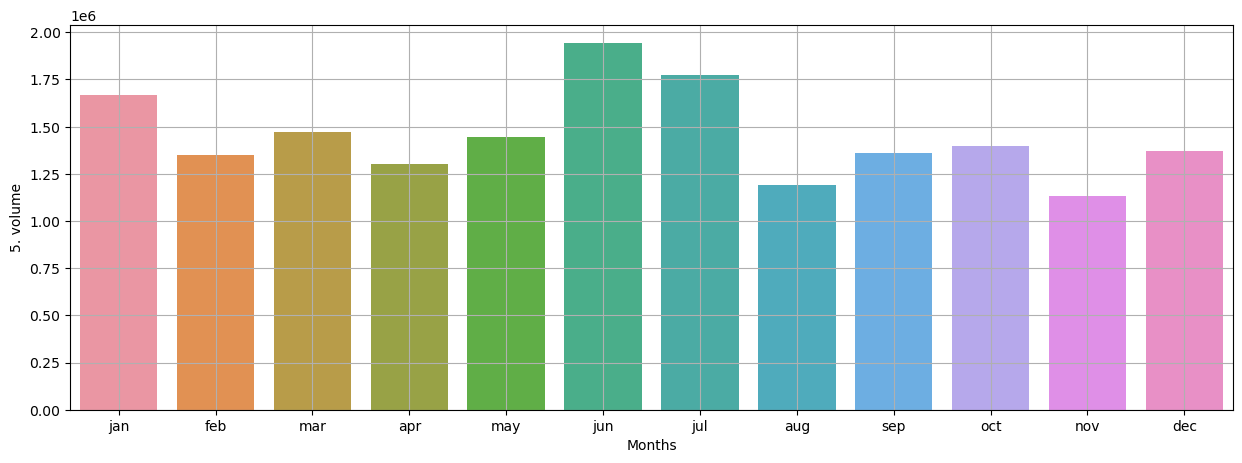

In [31]:
for y4 in y17.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y17['month'],y=y17[y4])
    plt.xlabel('Months')
    plt.ylabel(y4)
    plt.grid()
    plt.show()

## Year 2018

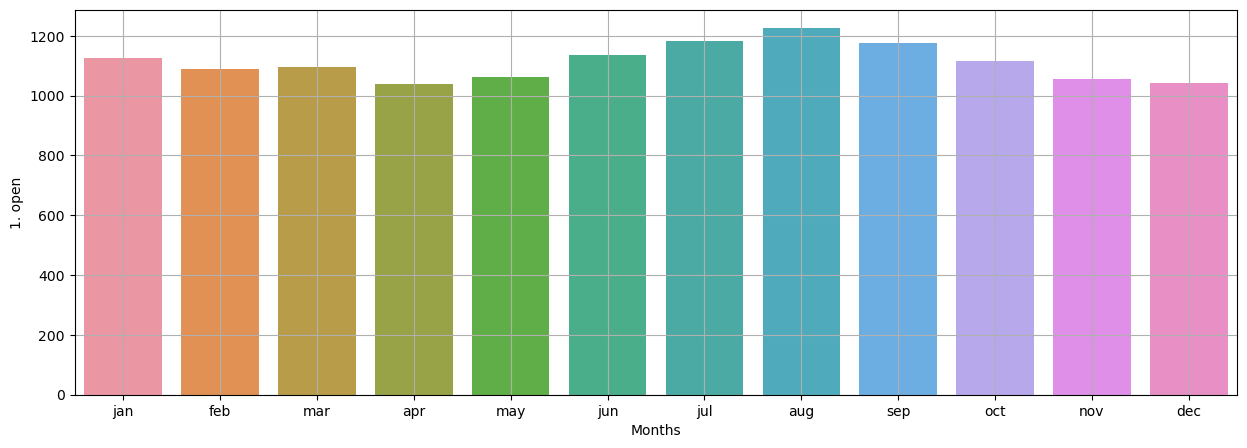

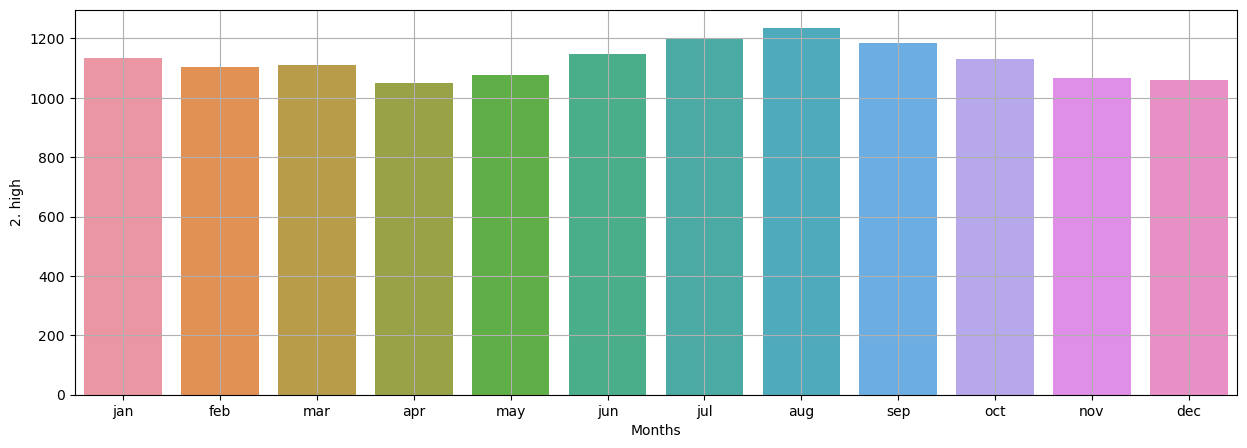

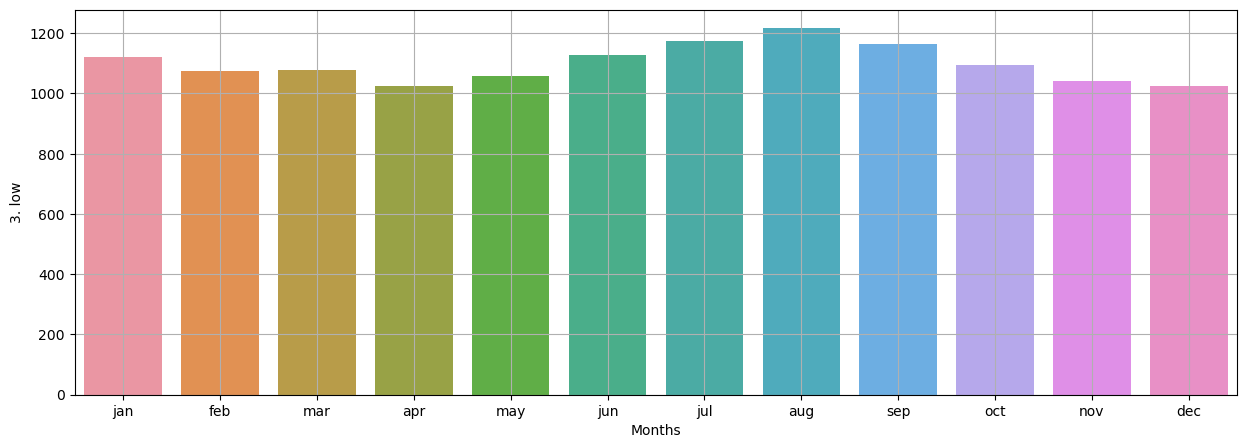

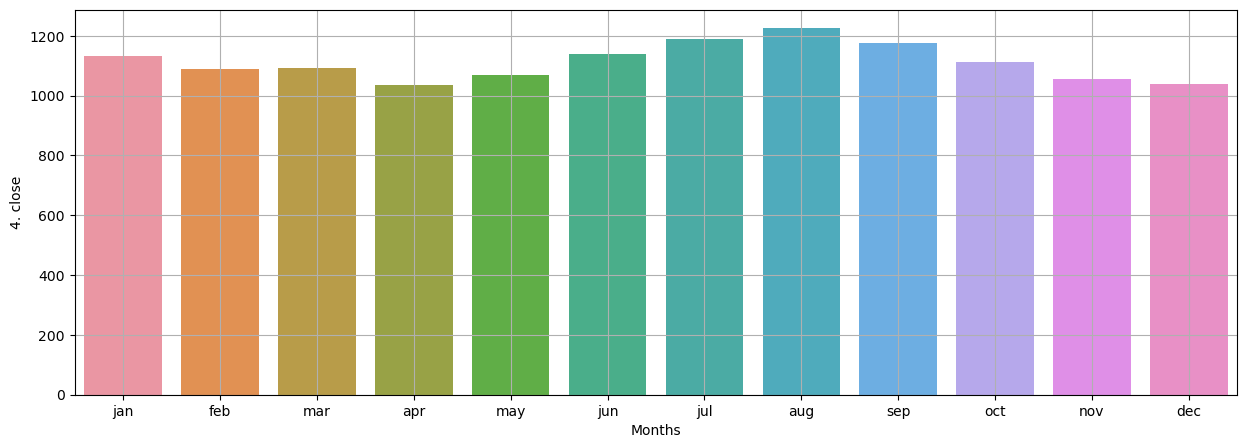

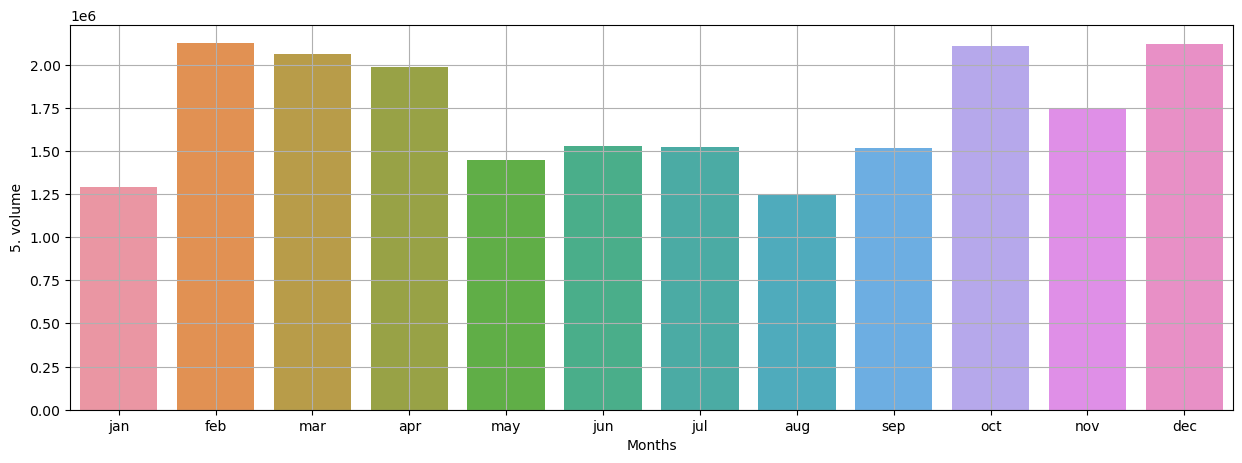

In [32]:
for y5 in y18.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y18['month'],y=y18[y5])
    plt.xlabel('Months')
    plt.ylabel(y5)
    plt.grid()
    plt.show()

## Year 2019 

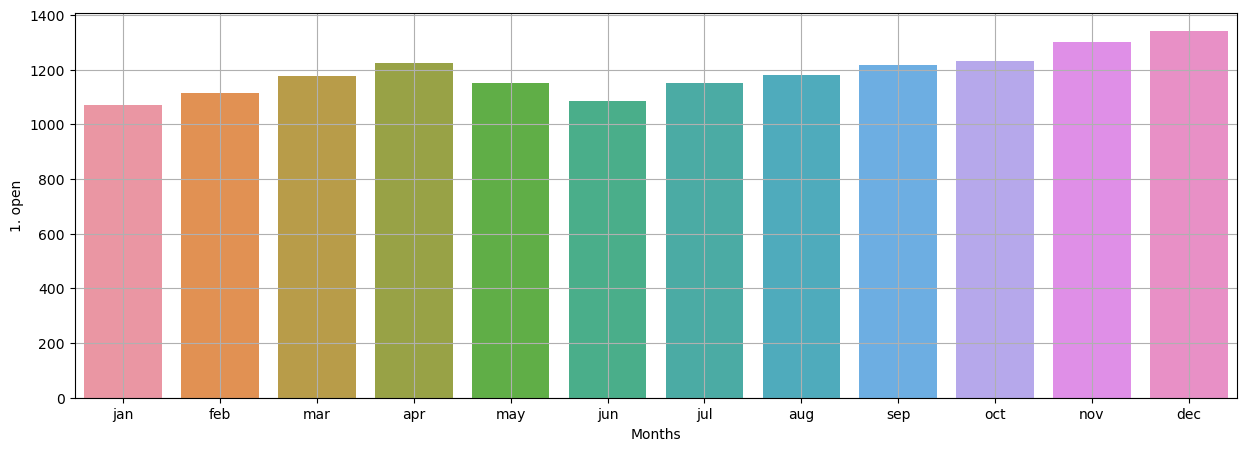

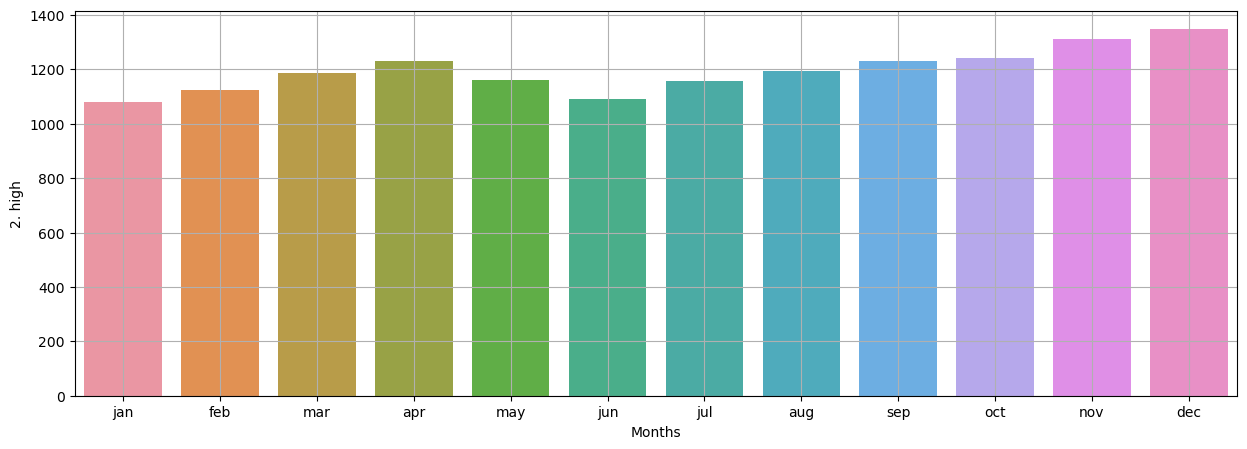

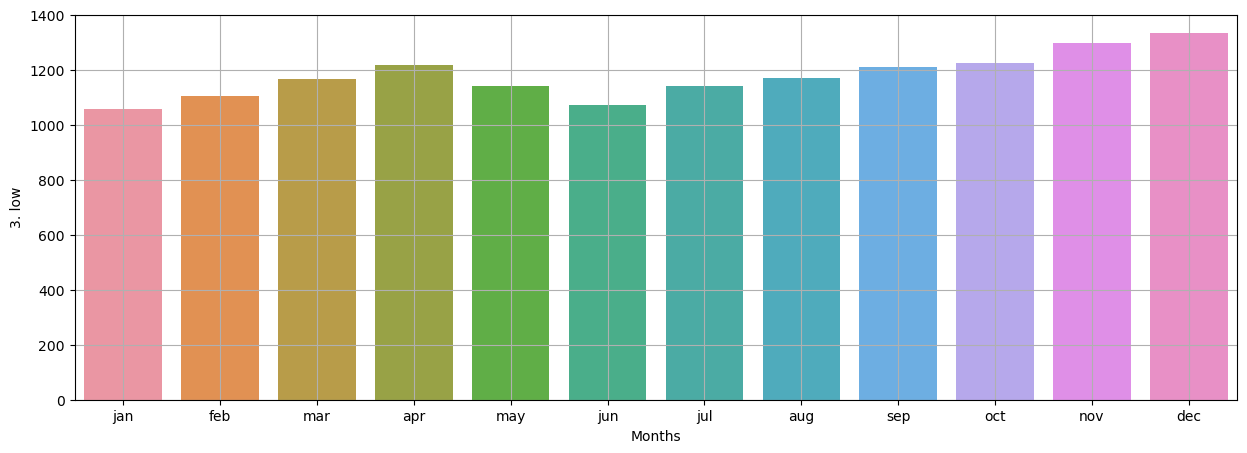

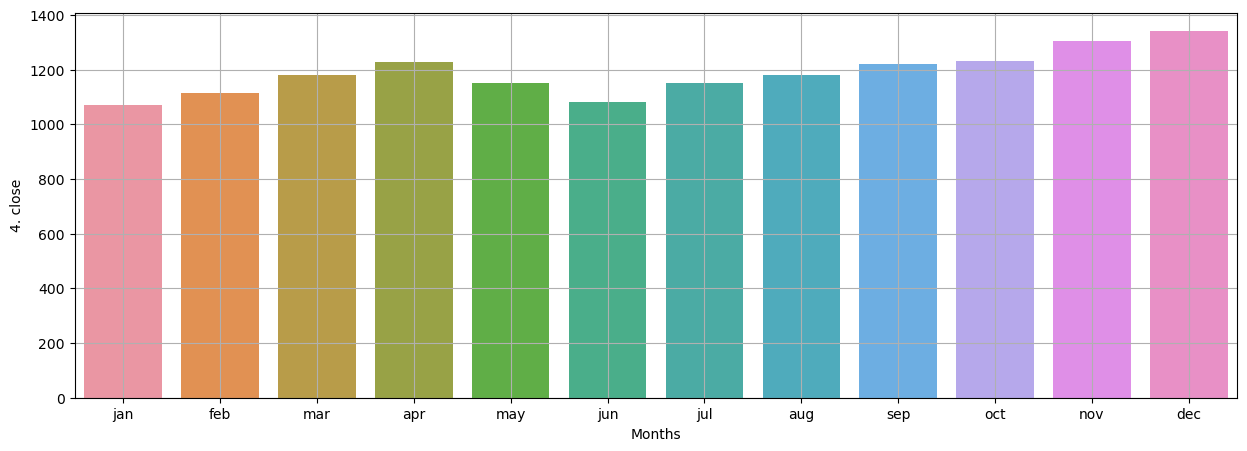

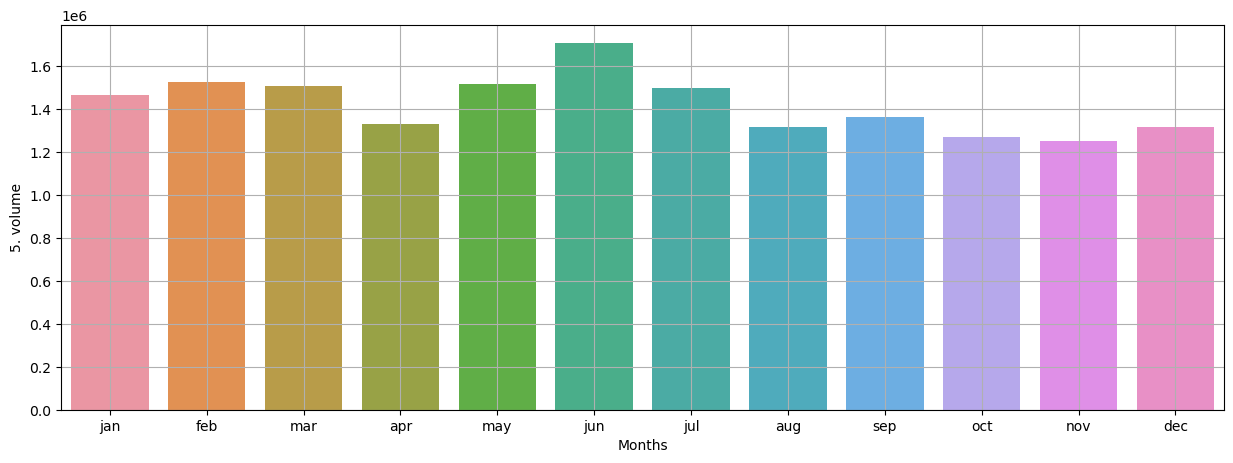

In [33]:
for y6 in y19.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y19['month'],y=y19[y6])
    plt.xlabel('Months')
    plt.ylabel(y6)
    plt.grid()
    plt.show()

## Year 2020

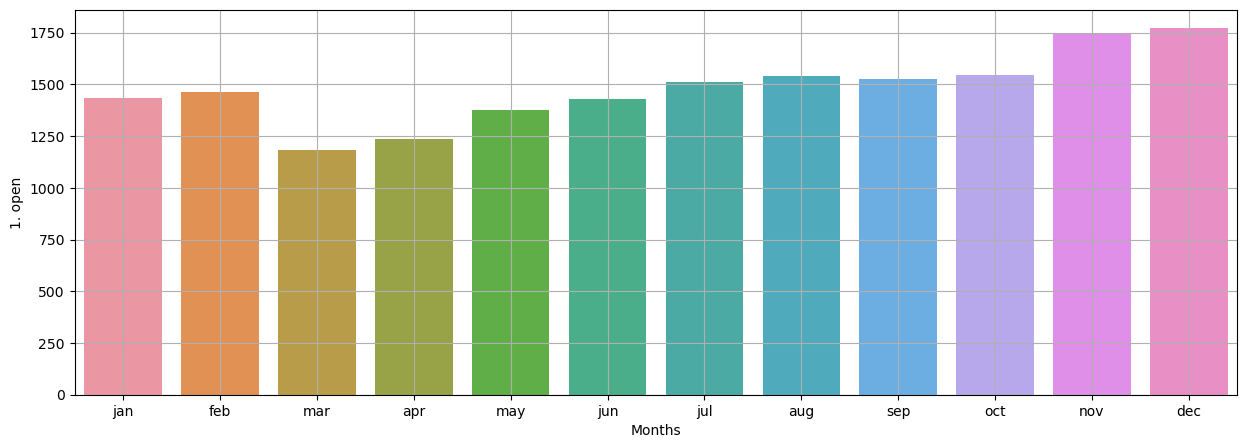

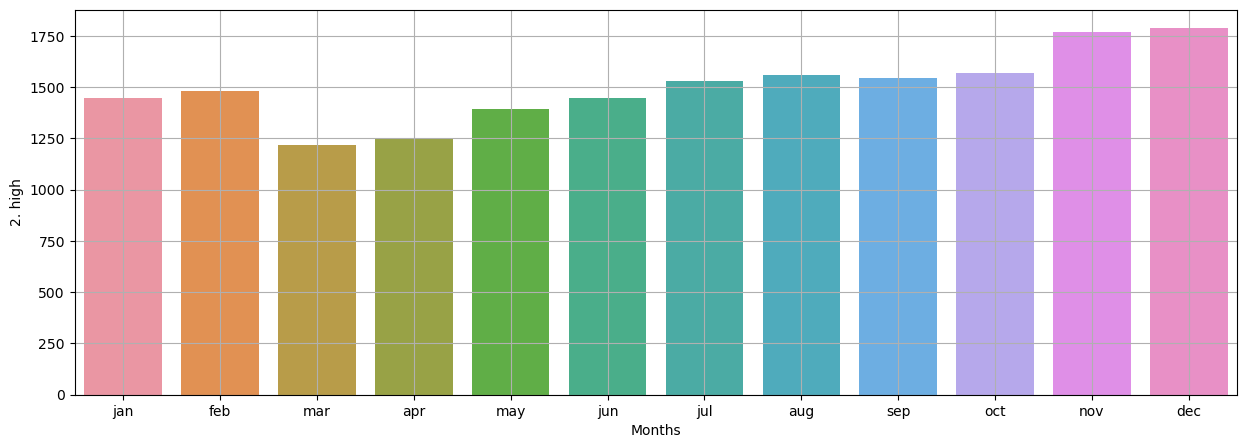

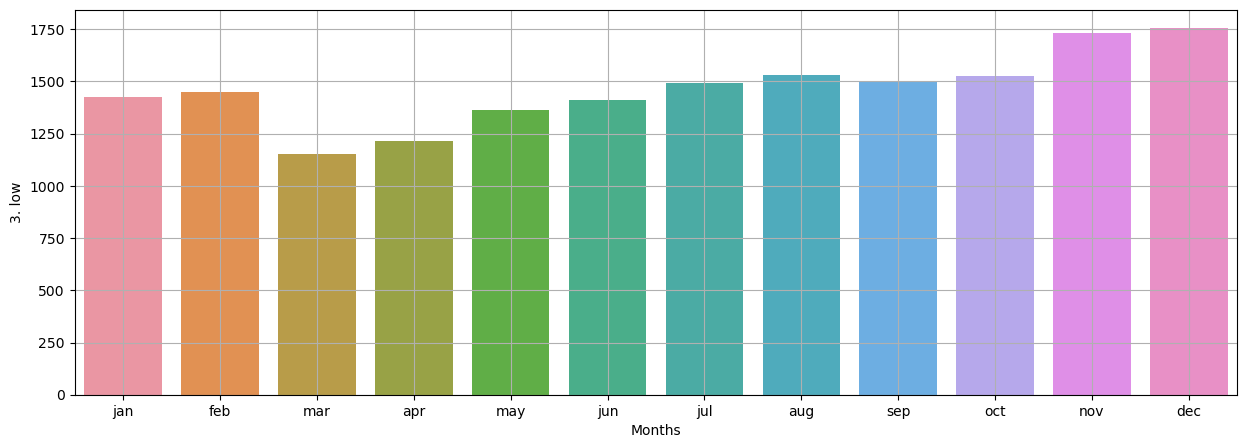

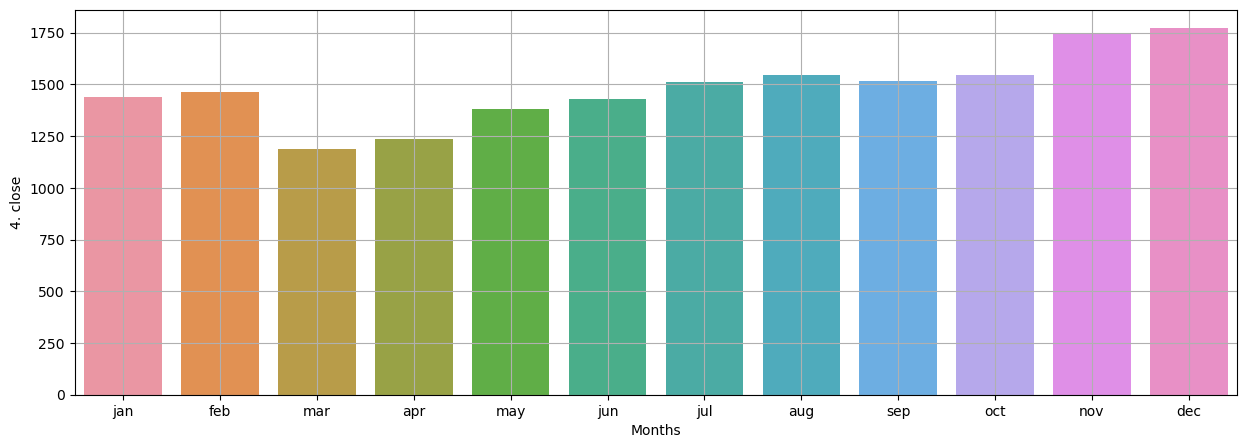

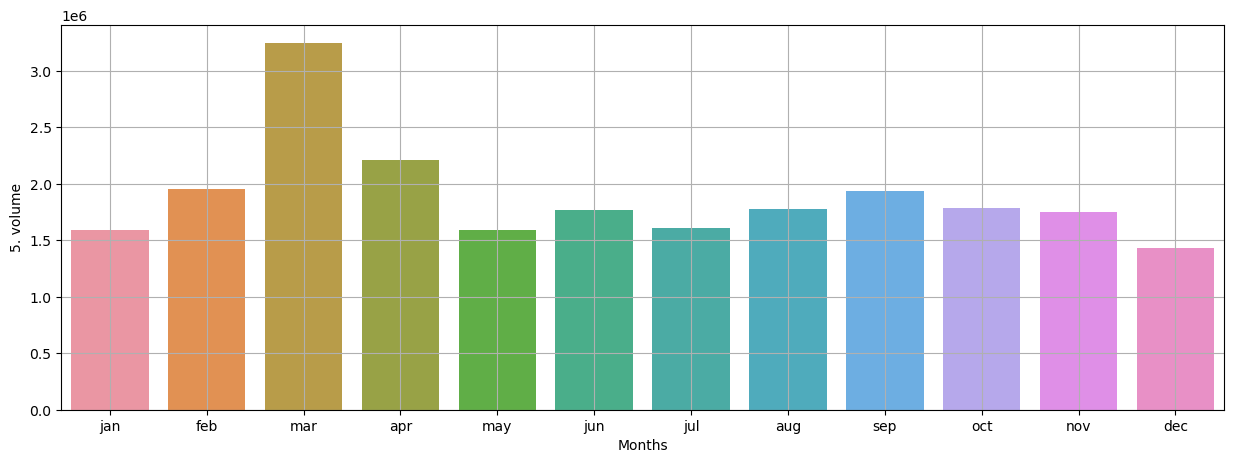

In [34]:
for y7 in y20.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y20['month'],y=y20[y7])
    plt.xlabel('Months')
    plt.ylabel(y7)
    plt.grid()
    plt.show()

## Year 2021 

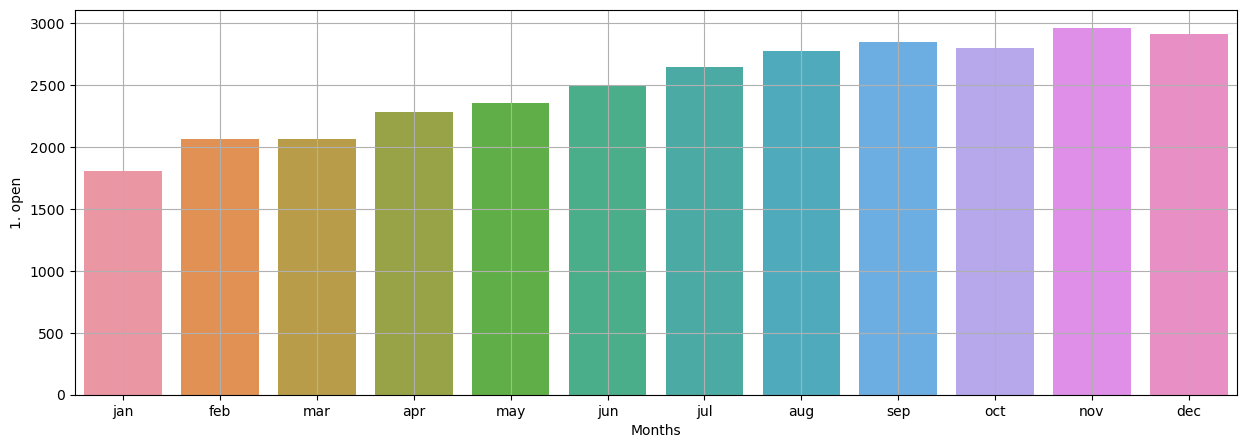

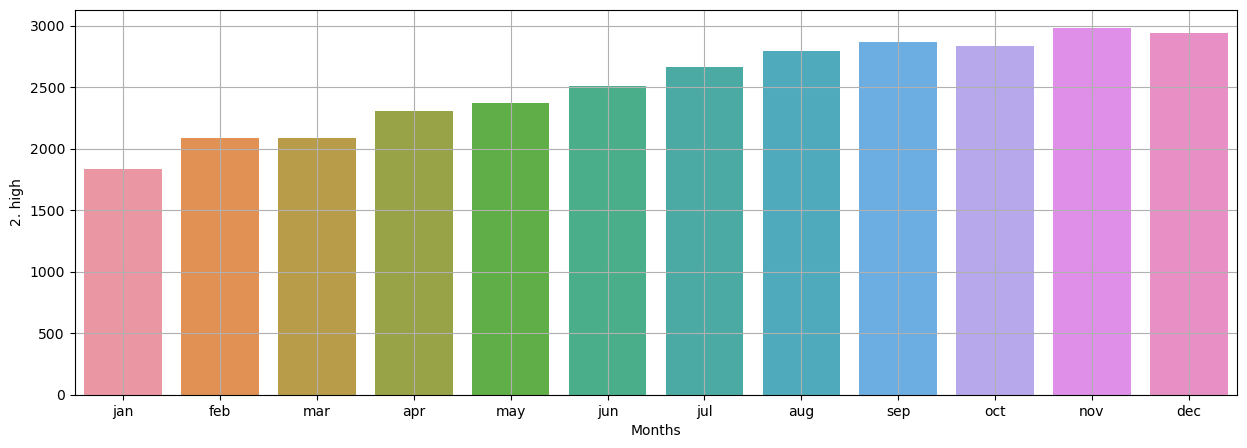

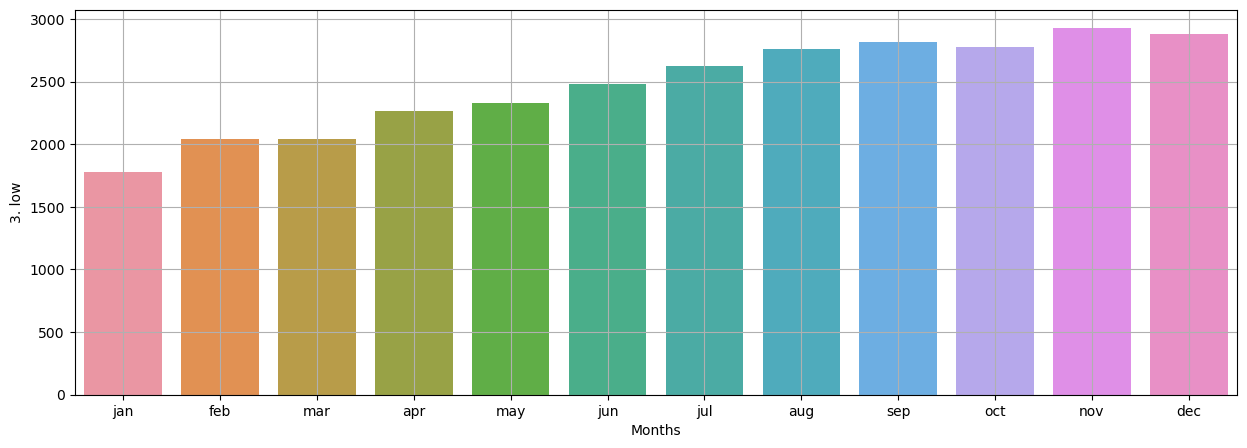

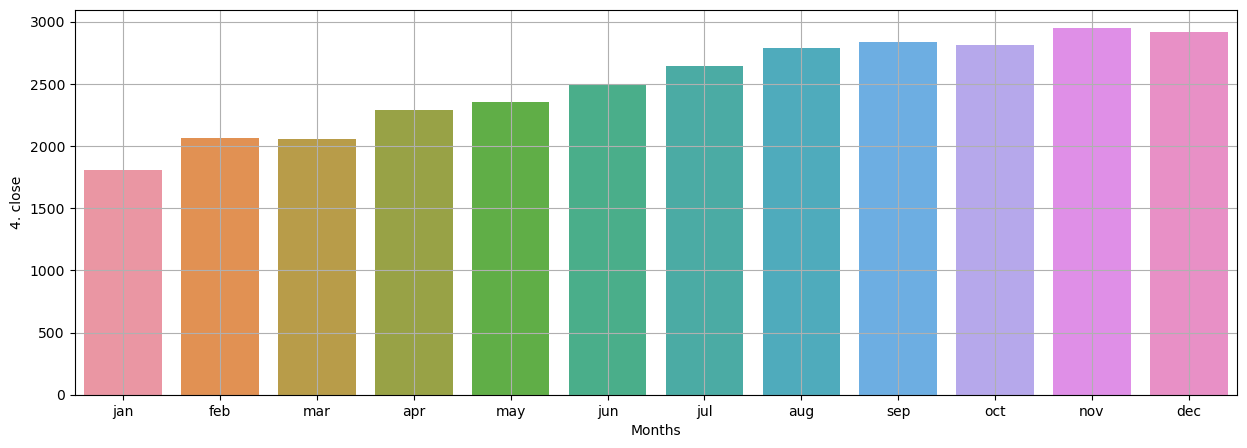

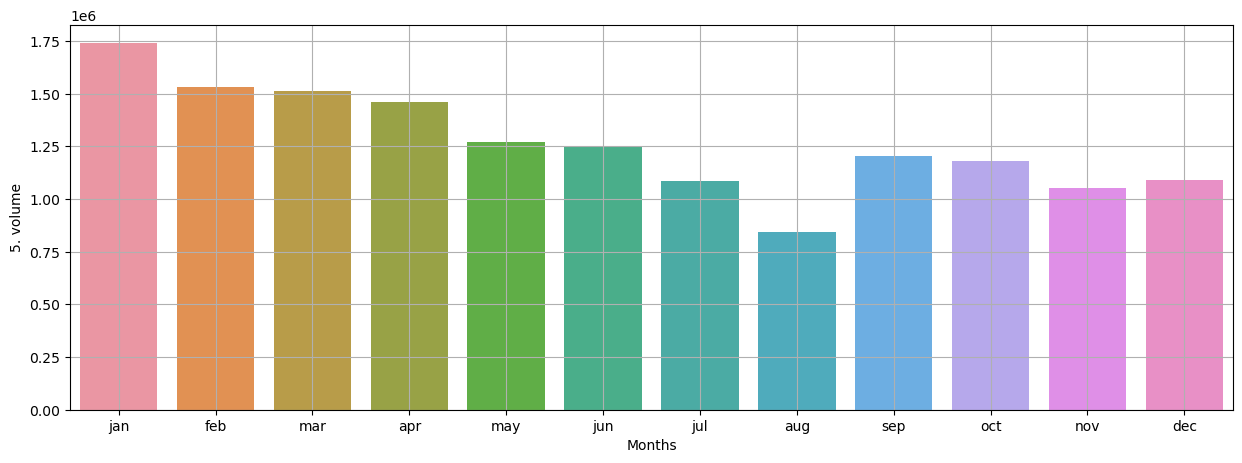

In [35]:
for y8 in y21.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y21['month'],y=y21[y8])
    plt.xlabel('Months')
    plt.ylabel(y8)
    plt.grid()
    plt.show()

## Year 2022

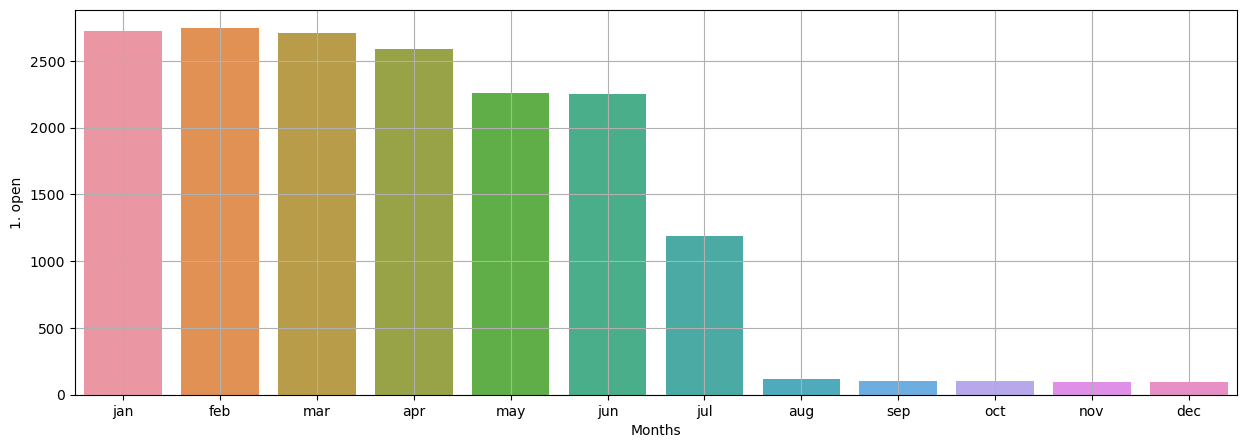

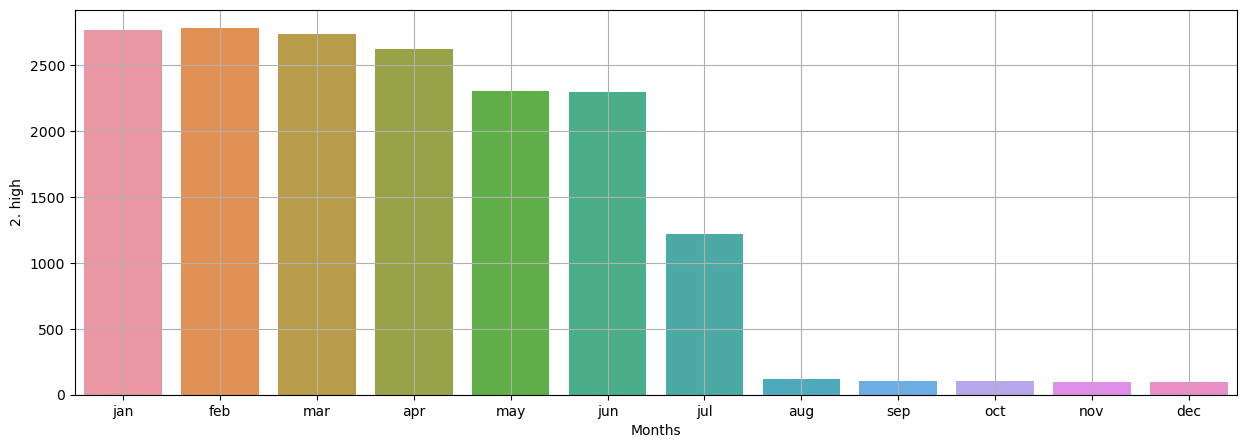

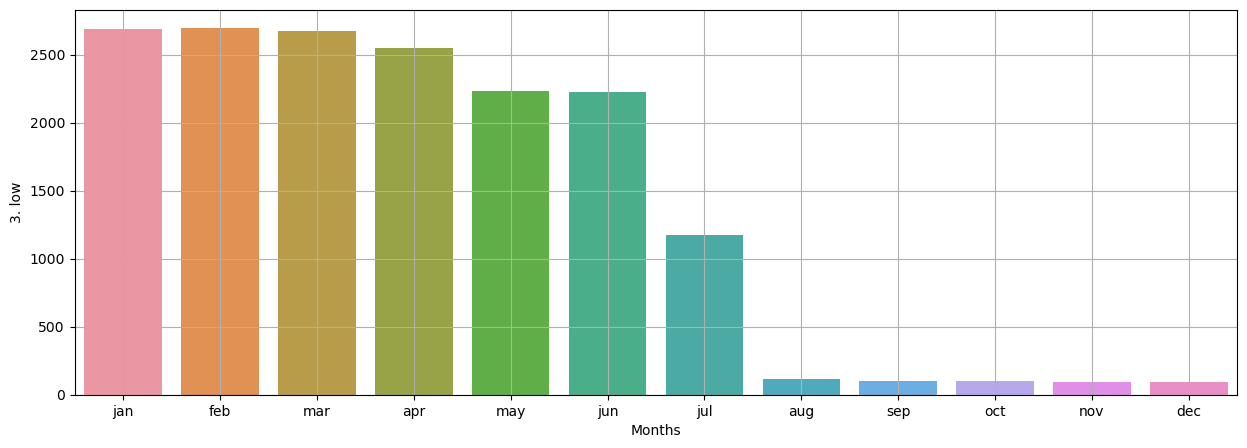

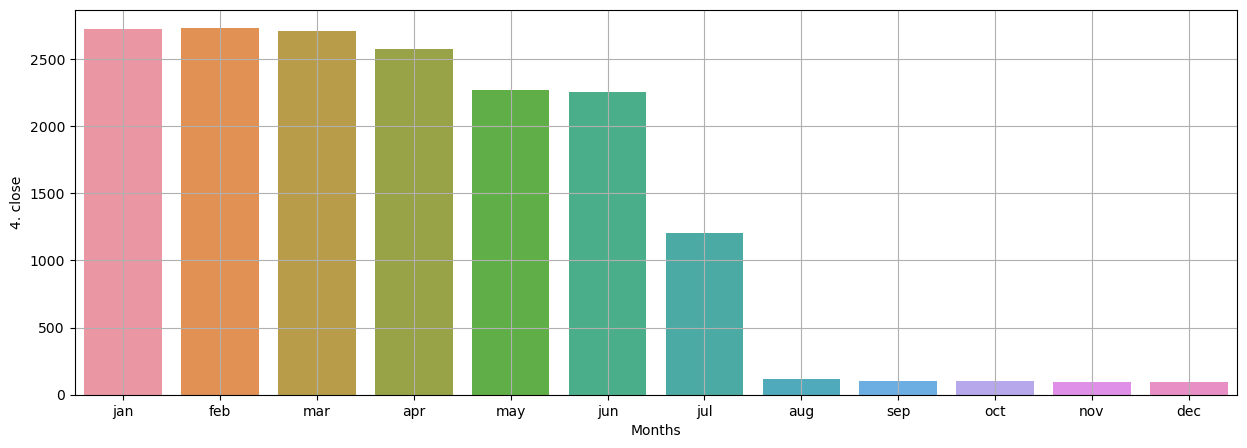

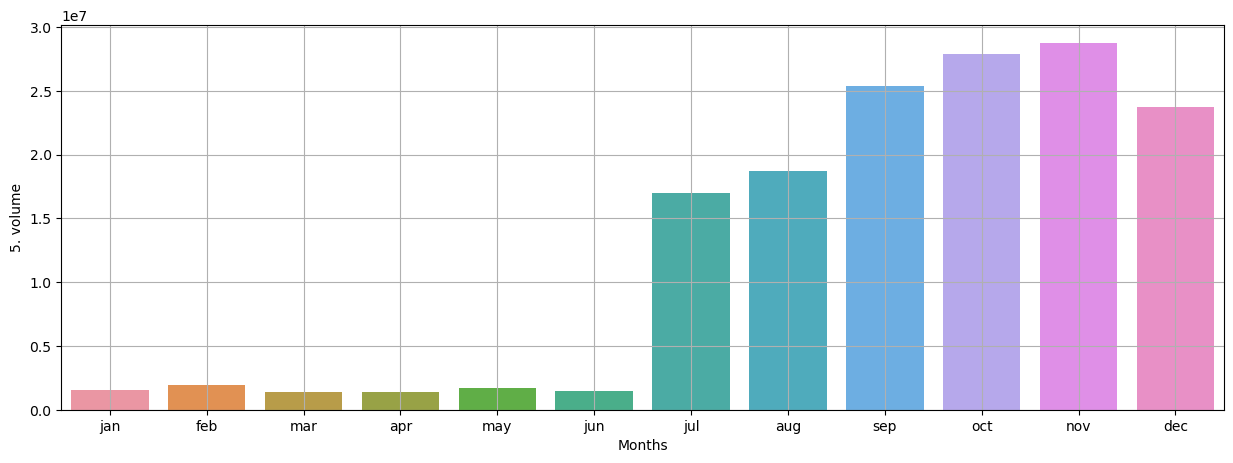

In [36]:
for y9 in y22.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y22['month'],y=y22[y9])
    plt.xlabel('Months')
    plt.ylabel(y9)
    plt.grid()
    plt.show()

## Year 2023

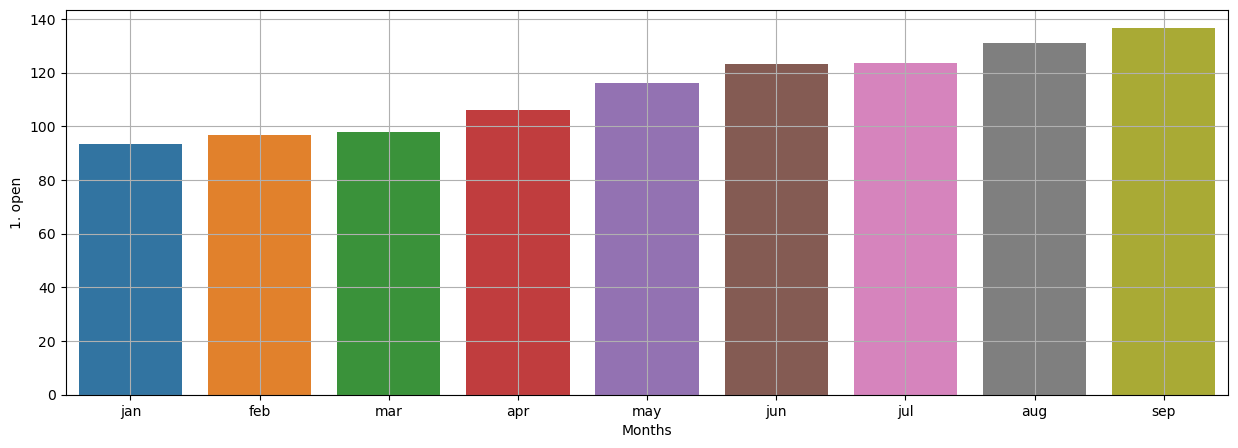

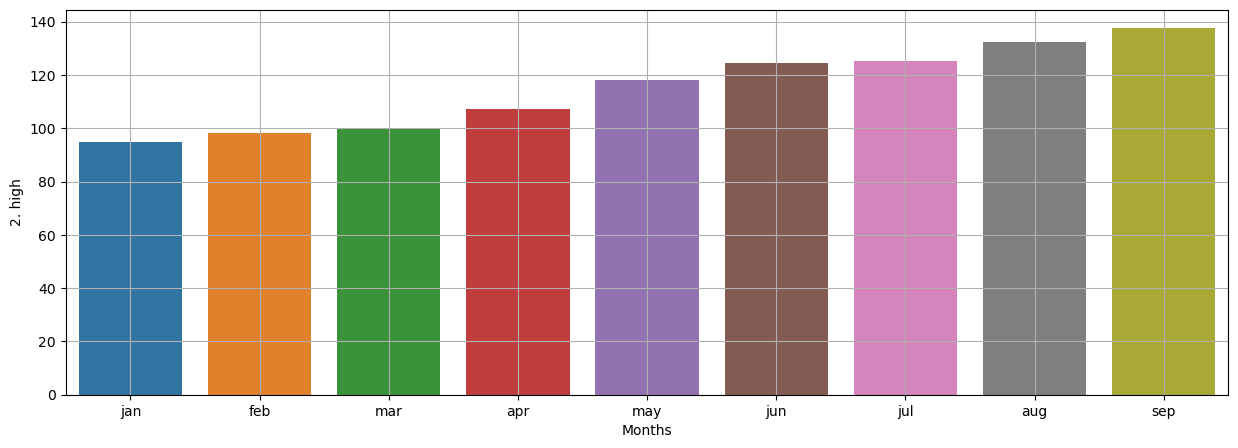

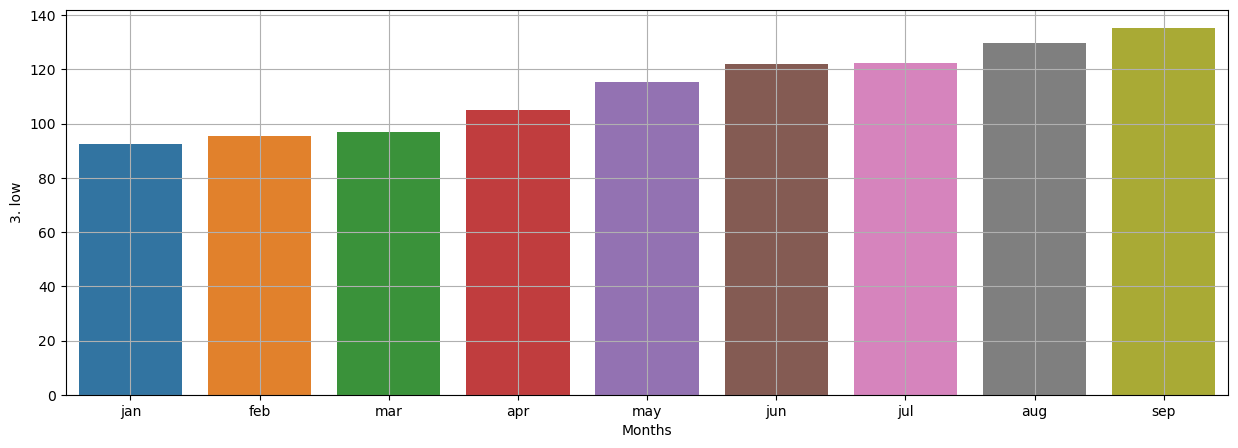

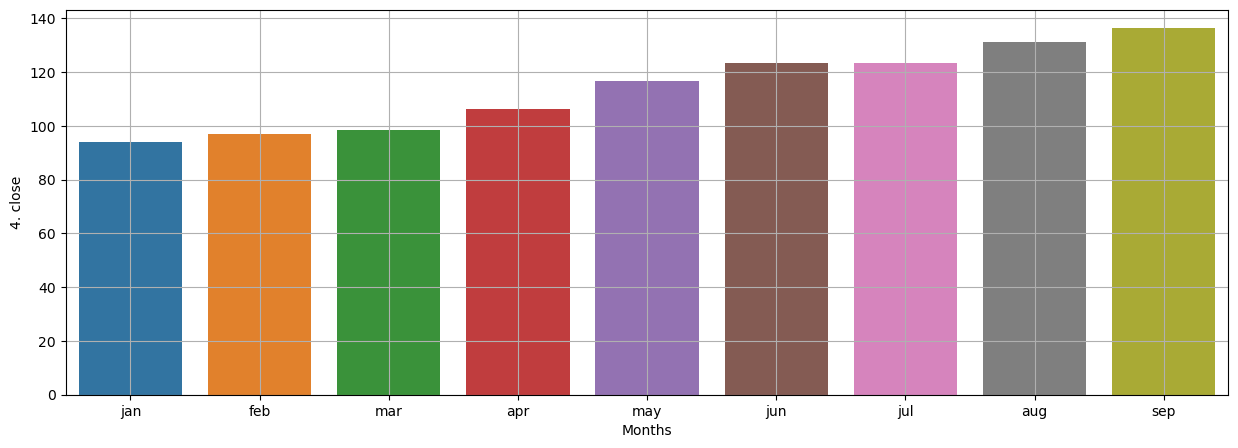

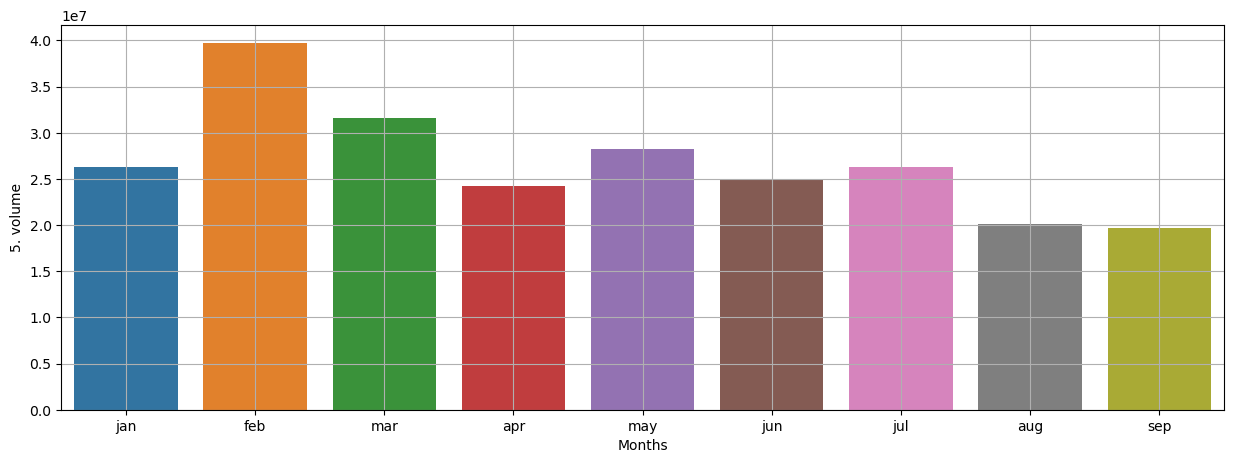

In [37]:
for y10 in y23.iloc[:,0:-1].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=y23['month'],y=y23[y10])
    plt.xlabel('Months')
    plt.ylabel(y10)
    plt.grid()
    plt.show()

## Train Test Split

In [38]:
from sklearn.preprocessing import MinMaxScaler
df1.drop(['daily return'],axis=1,inplace=True)
minmax=MinMaxScaler()
df1['high']=minmax.fit_transform(df1)

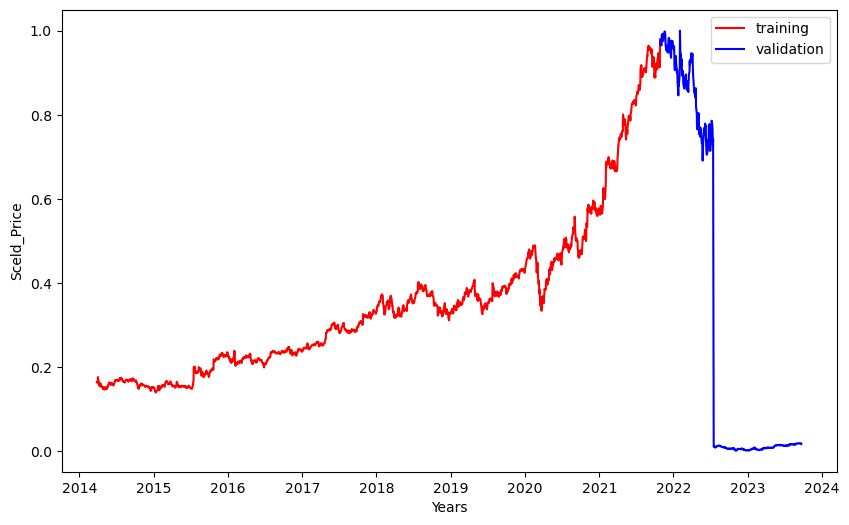

In [39]:
train_len=math.ceil(len(df1['high'])*0.8)
train_ds=df1.iloc[0:train_len,0:]
test_ds=df1.iloc[train_len:,0:]
plt.figure(figsize=(10,6))
plt.plot(train_ds.index,train_ds['high'],color='red',label='training')
plt.plot(test_ds.index,test_ds['high'],color='blue',label='validation')
plt.xlabel('Years')
plt.ylabel('Sceld_Price')
plt.legend()
plt.show()

In [40]:
train_ds,test_ds

(                high
 date                
 2014-03-27  0.162902
 2014-03-28  0.162371
 2014-03-31  0.162564
 2014-04-01  0.163055
 2014-04-02  0.175364
 ...              ...
 2021-10-21  0.937400
 2021-10-22  0.928664
 2021-10-25  0.912743
 2021-10-26  0.923798
 2021-10-27  0.979820
 
 [1912 rows x 1 columns],
                 high
 date                
 2021-10-28  0.968360
 2021-10-29  0.976403
 2021-11-01  0.974958
 2021-11-02  0.964950
 2021-11-03  0.964882
 ...              ...
 2023-09-18  0.018062
 2023-09-19  0.017806
 2023-09-20  0.017693
 2023-09-21  0.015781
 2023-09-22  0.015720
 
 [478 rows x 1 columns])

In [41]:
trainx=pd.Series(train_ds['high'].values)
trainx.index=train_ds.index
window=50
x_train=[]
y_train=[]
train_ind=[]
for i in range(window,len(trainx)):
    x_train.append(trainx[i-window:i])
    y_train.append(trainx[i])
    train_ind.append(trainx.index[i])
x_train1=np.array(x_train)
y_train1=np.array(y_train)

In [42]:
testx = pd.Series(test_ds['high'].values)
testx.index = test_ds.index
x_test=[]
y_test=[]
test_ind=[]
for j in range(window,len(testx)):
    x_test.append(testx[j-window:j])
    y_test.append(testx[j])
    test_ind.append(testx.index[j])
x_test1=np.array(x_test)
y_test1=np.array(y_test)

In [43]:
x_train1=np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((1862, 50, 1), (428, 50, 1), (1862,), (428,))

# LSTM

In [44]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [45]:
path='C:\\Users\\admin\\LSTM22-{epoch:02d}-{loss:.6f}.h5'
check=ModelCheckpoint(filepath=path,monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [46]:
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(x_train1.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [47]:
H1=model.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=200,callbacks=[check])

Epoch 1/200
58/59 [============================>.] - ETA: 0s - loss: 0.0465
Epoch 1: val_loss improved from inf to 0.01609, saving model to C:\Users\admin\LSTM22-01-0.046377.h5
59/59 [==============================] - 6s 37ms/step - loss: 0.0464 - val_loss: 0.0161
Epoch 2/200
58/59 [============================>.] - ETA: 0s - loss: 7.2820e-04
Epoch 2: val_loss improved from 0.01609 to 0.00775, saving model to C:\Users\admin\LSTM22-02-0.000727.h5
59/59 [==============================] - 2s 29ms/step - loss: 7.2659e-04 - val_loss: 0.0078
Epoch 3/200
58/59 [============================>.] - ETA: 0s - loss: 2.7457e-04
Epoch 3: val_loss improved from 0.00775 to 0.00703, saving model to C:\Users\admin\LSTM22-03-0.000274.h5
59/59 [==============================] - 2s 27ms/step - loss: 2.7387e-04 - val_loss: 0.0070
Epoch 4/200
58/59 [============================>.] - ETA: 0s - loss: 2.5981e-04
Epoch 4: val_loss improved from 0.00703 to 0.00700, saving model to C:\Users\admin\LSTM22-04-0.000259

In [48]:
latm=load_model("C:\\Users\\admin\\Downloads\\LSTM22-186-0.000049.h5")

In [49]:
y_pre_lstm=latm.predict(x_test1)

14/14 [==============================] - 1s 11ms/step


In [50]:
lstm_df=pd.DataFrame({'Actual':list(y_test1),'Predicted':list(y_pre_lstm)})
data=minmax.inverse_transform(lstm_df)
f_df=pd.DataFrame(data,columns=['Actual','Predicted'])
f_df.index=test_ind
f_df

,Actual,Predicted
2022-01-10,2772.8000,2736.551296
2022-01-11,2806.5900,2765.854213
2022-01-12,2856.2849,2807.288465
2022-01-13,2863.7100,2854.788913
2022-01-14,2824.0100,2857.305514
...,...,...
2023-09-18,139.9300,163.435686
2023-09-19,139.1750,163.852609
2023-09-20,138.8400,163.796415
2023-09-21,133.1900,163.646592


In [51]:
tr_df=pd.DataFrame({'tr_data':list(y_train1)})
tr1=minmax.inverse_transform(tr_df)
tr1_df=pd.DataFrame(tr1,columns=['tr_data'])
tr1_df.index=train_ind

In [52]:
ss2=test_ds.head(50)
otd=pd.DataFrame({'ts_d':list([v for v in ss2['high'].values])})
o_data=minmax.inverse_transform(otd)
otd2=pd.DataFrame(o_data,columns=['ts_d1'])
otd2.index=ss2.index

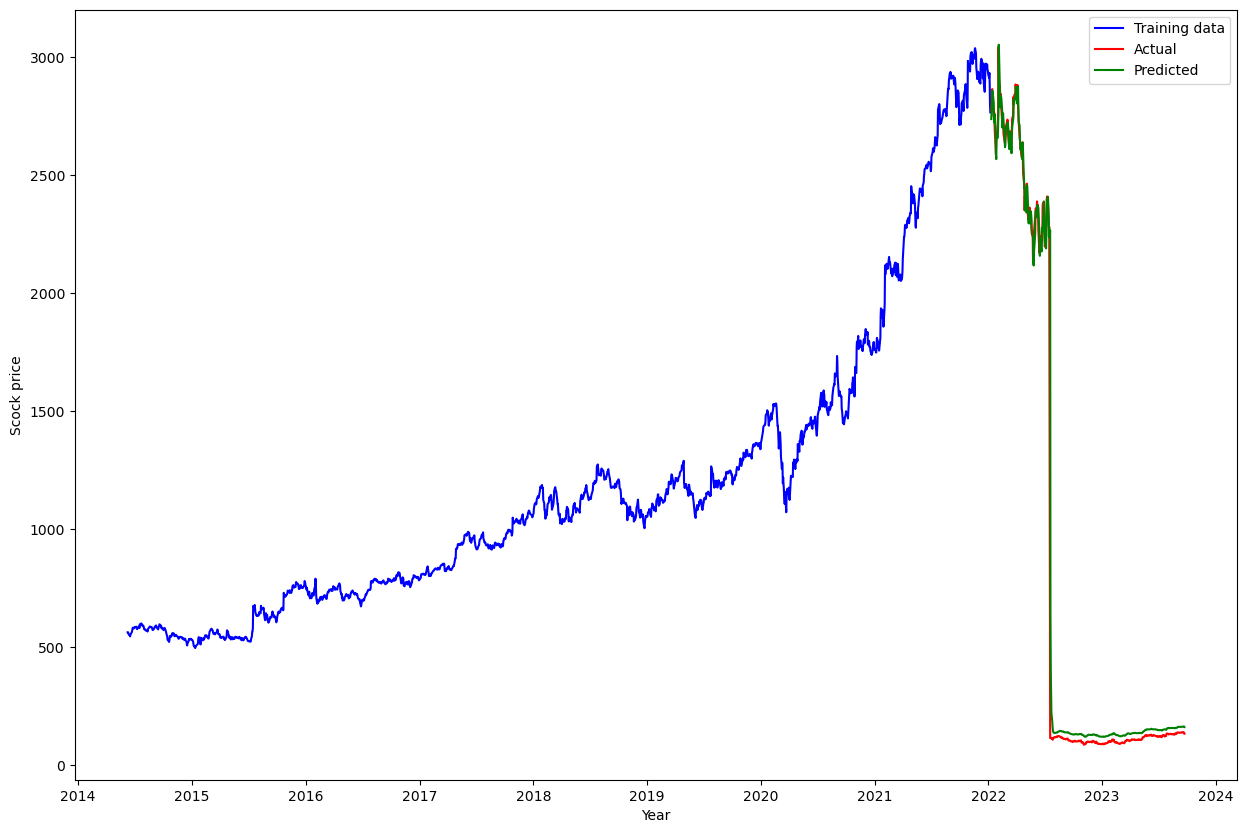

In [53]:
plt.figure(figsize=(15,10))
plt.plot(tr1_df['tr_data'],color='blue',label='Training data')
plt.plot(otd2['ts_d1'],color='blue')
plt.plot(f_df['Actual'],label='Actual',color='red')
plt.plot(f_df['Predicted'],label='Predicted',color='green')
plt.xlabel('Year')
plt.ylabel('Scock price')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 value is = '+str(r2_score(f_df['Actual'],f_df['Predicted'])))

R2 value is = 0.9896042024388665


In [55]:
print('MSE value is ={}'.format(mean_squared_error(f_df['Actual'],f_df['Predicted'])))
print('MAE value is ={}'.format(mean_absolute_error(f_df['Actual'],f_df['Predicted'])))
print('RMSE value is ={}'.format((mean_squared_error(f_df['Actual'],f_df['Predicted'])**(1/2))))

MSE value is =13187.936744448238
MAE value is =39.03847167594117
RMSE value is =114.83874234964539


## Training and Validation loss

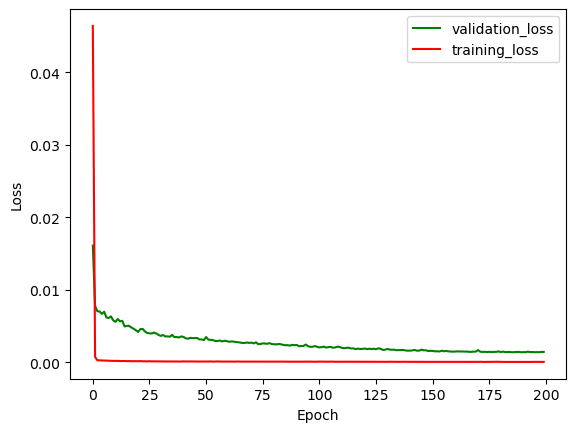

In [56]:
plt.plot(H1.epoch, H1.history['val_loss'], color='green', label='validation_loss')
plt.plot(H1.epoch , H1.history['loss'],label='training_loss',color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
